# Q3.1: Revised Team 22 Project

### Comments received
1. You may consider using geographical features to differentiate the carparks from each other.
Also, instead of using one ML model per carpark, we would recommend to use one model for all carparks.

2. The “web/phone application or integration with established wayfinding applications” is interesting and a good purpose, but it does not suit the theme of this module as much as doing data analysis. Do allocate your time and resources wisely if your team decide to do this.

### Revision of project
Having internalised the comments, we have decided to use a model for all carparks. By comparing 3 models (MLP,LR and LSTM), we will use the final selected model to predict a user-specified carpark availability for the next 24 hours.


### Preamble
With the steadily increasing motor vehicle population in Singapore of 957,006 in 2018 to 988,755 in 2021, parking demand also experiences an upward trend. Parking has become a major traffic issue for not only vehicle owners but also to local authorities in charge of allocating scarce land resources.

### Proposed Solution
In summary, our group wishes to create a carpark recommendation system with the ability to forecast demand. Determining the carpark’s demand at certain timeframes will be done using time-series forecast which utilised historical data to predict future demand trends. This system generally benefits vehicle owners but can be extended to be gain insights into state planning (land allocation for vehicle parking or congestion). 

From a user’s perspective, users could provide the destination (in GPS 
coordinates) and the system will provide the top-n nearest carparks and their respective current available lots. If users were to specify a timeframe in the future, they will be able to view a demand forecast graph (as seen in figure below) in hourly intervals. This feature allows users to plan their trips accordingly to avoid peak demand periods. 

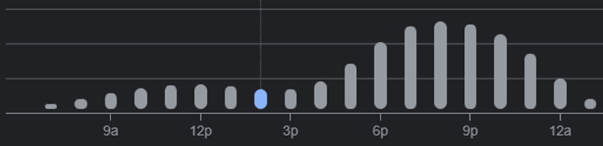


In [33]:
import pandas as pd
import numpy as np

# Data cleaning and preparation

We start by loading data from July to September 2022.

In [34]:
def load_data(month, days=31):
    full_df = pd.read_csv(f"./data/2022-{str(month)}-1.csv")
    for date in range(2, days+1):
        test_df = pd.read_csv(f'./data/2022-{str(month)}-{date}.csv')
        full_df = pd.concat([full_df, test_df])
    full_df['timestamp'] = pd.to_datetime(full_df['timestamp'])
    full_df = full_df.set_index('timestamp')
    return full_df

In [35]:
jul = load_data(7)
aug = load_data(8)
sep = load_data(9, days=30)
full_data = pd.concat([jul, aug, sep])
full_data.dropna(inplace=True)

In [36]:
full_data['available rate'] = full_data['lots_available'] / full_data['total_lots']
full_data.dropna(inplace=True)
grped_full = full_data.groupby(full_data.carpark_number)

In [72]:
for key, item in grped_full:
    print(grped_full.get_group(key), "\n\n")

                    carpark_number  total_lots  lots_available lot_type  \
timestamp                                                                 
2022-07-01 00:15:00            A10          64              26        C   
2022-07-01 00:30:00            A10          64              26        C   
2022-07-01 00:45:00            A10          64              25        C   
2022-07-01 01:00:00            A10          64              22        C   
2022-07-01 01:15:00            A10          64              23        C   
...                            ...         ...             ...      ...   
2022-09-30 19:00:00            A10          62              34        C   
2022-09-30 20:00:00            A10          62              30        C   
2022-09-30 21:00:00            A10          62              36        C   
2022-09-30 22:00:00            A10          62              33        C   
2022-09-30 23:00:00            A10          62              33        C   

                     ava

                    carpark_number  total_lots  lots_available lot_type  \
timestamp                                                                 
2022-07-01 00:15:00            A54         768             651        C   
2022-07-01 00:30:00            A54         768             654        C   
2022-07-01 00:45:00            A54         768             655        C   
2022-07-01 01:00:00            A54         768             658        C   
2022-07-01 01:15:00            A54         768             666        C   
...                            ...         ...             ...      ...   
2022-09-30 19:00:00            A54         767             228        C   
2022-09-30 20:00:00            A54         767             187        C   
2022-09-30 21:00:00            A54         767             368        C   
2022-09-30 22:00:00            A54         767             534        C   
2022-09-30 23:00:00            A54         767             598        C   

                     ava

                    carpark_number  total_lots  lots_available lot_type  \
timestamp                                                                 
2022-07-01 00:15:00           AM22         289              88        C   
2022-07-01 00:30:00           AM22         289              87        C   
2022-07-01 00:45:00           AM22         289              88        C   
2022-07-01 01:00:00           AM22         289              87        C   
2022-07-01 01:15:00           AM22         289              88        C   
...                            ...         ...             ...      ...   
2022-09-30 19:00:00           AM22         289             165        C   
2022-09-30 20:00:00           AM22         289             145        C   
2022-09-30 21:00:00           AM22         289             137        C   
2022-09-30 22:00:00           AM22         289             124        C   
2022-09-30 23:00:00           AM22         289             119        C   

                     ava

                    carpark_number  total_lots  lots_available lot_type  \
timestamp                                                                 
2022-07-01 00:15:00            B32         124              51        C   
2022-07-01 00:30:00            B32         124              50        C   
2022-07-01 00:45:00            B32         124              48        C   
2022-07-01 01:00:00            B32         124              48        C   
2022-07-01 01:15:00            B32         124              48        C   
...                            ...         ...             ...      ...   
2022-09-30 19:00:00            B32         124              66        C   
2022-09-30 20:00:00            B32         124              70        C   
2022-09-30 21:00:00            B32         124              65        C   
2022-09-30 22:00:00            B32         124              60        C   
2022-09-30 23:00:00            B32         124              55        C   

                     ava

                    carpark_number  total_lots  lots_available lot_type  \
timestamp                                                                 
2022-07-01 00:15:00            B75         329             246        C   
2022-07-01 00:30:00            B75         329             244        C   
2022-07-01 00:45:00            B75         329             243        C   
2022-07-01 01:00:00            B75         329             243        C   
2022-07-01 01:15:00            B75         329             241        C   
...                            ...         ...             ...      ...   
2022-09-30 19:00:00            B75         329             272        C   
2022-09-30 20:00:00            B75         329             274        C   
2022-09-30 21:00:00            B75         329             263        C   
2022-09-30 22:00:00            B75         329             254        C   
2022-09-30 23:00:00            B75         329             253        C   

                     ava

                    carpark_number  total_lots  lots_available lot_type  \
timestamp                                                                 
2022-07-01 00:15:00           BBM3        1214             489        C   
2022-07-01 00:30:00           BBM3        1214             478        C   
2022-07-01 00:45:00           BBM3        1214             470        C   
2022-07-01 01:00:00           BBM3        1214             463        C   
2022-07-01 01:15:00           BBM3        1214             461        C   
...                            ...         ...             ...      ...   
2022-09-30 19:00:00           BBM3        1214             755        C   
2022-09-30 20:00:00           BBM3        1214             683        C   
2022-09-30 21:00:00           BBM3        1214             636        C   
2022-09-30 22:00:00           BBM3        1214             579        C   
2022-09-30 23:00:00           BBM3        1214             522        C   

                     ava

                    carpark_number  total_lots  lots_available lot_type  \
timestamp                                                                 
2022-07-01 00:15:00           BE42         852             403        C   
2022-07-01 00:30:00           BE42         852             397        C   
2022-07-01 00:45:00           BE42         852             397        C   
2022-07-01 01:00:00           BE42         852             390        C   
2022-07-01 01:15:00           BE42         852             387        C   
...                            ...         ...             ...      ...   
2022-09-30 19:00:00           BE42         852             617        C   
2022-09-30 20:00:00           BE42         852             574        C   
2022-09-30 21:00:00           BE42         852             552        C   
2022-09-30 22:00:00           BE42         852             503        C   
2022-09-30 23:00:00           BE42         852             462        C   

                     ava

                    carpark_number  total_lots  lots_available lot_type  \
timestamp                                                                 
2022-07-01 00:15:00           BJ17         172              89        C   
2022-07-01 00:30:00           BJ17         172              88        C   
2022-07-01 00:45:00           BJ17         172              87        C   
2022-07-01 01:00:00           BJ17         172              86        C   
2022-07-01 01:15:00           BJ17         172              85        C   
...                            ...         ...             ...      ...   
2022-09-30 19:00:00           BJ17         172             123        C   
2022-09-30 20:00:00           BJ17         172             114        C   
2022-09-30 21:00:00           BJ17         172             113        C   
2022-09-30 22:00:00           BJ17         172             109        C   
2022-09-30 23:00:00           BJ17         172             105        C   

                     ava

                    carpark_number  total_lots  lots_available lot_type  \
timestamp                                                                 
2022-07-01 00:15:00           BJ35         140              41        C   
2022-07-01 00:30:00           BJ35         140              41        C   
2022-07-01 00:45:00           BJ35         140              42        C   
2022-07-01 01:00:00           BJ35         140              42        C   
2022-07-01 01:15:00           BJ35         140              41        C   
...                            ...         ...             ...      ...   
2022-09-30 19:00:00           BJ35         140              68        C   
2022-09-30 20:00:00           BJ35         140              66        C   
2022-09-30 21:00:00           BJ35         140              61        C   
2022-09-30 22:00:00           BJ35         140              57        C   
2022-09-30 23:00:00           BJ35         140              46        C   

                     ava

                    carpark_number  total_lots  lots_available lot_type  \
timestamp                                                                 
2022-07-01 00:15:00           BJ61         470             125        C   
2022-07-01 00:30:00           BJ61         470             121        C   
2022-07-01 00:45:00           BJ61         470             121        C   
2022-07-01 01:00:00           BJ61         470             120        C   
2022-07-01 01:15:00           BJ61         470             120        C   
...                            ...         ...             ...      ...   
2022-09-30 19:00:00           BJ61         470             290        C   
2022-09-30 20:00:00           BJ61         470             258        C   
2022-09-30 21:00:00           BJ61         470             232        C   
2022-09-30 22:00:00           BJ61         470             203        C   
2022-09-30 23:00:00           BJ61         470             179        C   

                     ava

                    carpark_number  total_lots  lots_available lot_type  \
timestamp                                                                 
2022-07-01 00:15:00           BL19         369             149        C   
2022-07-01 00:30:00           BL19         369             152        C   
2022-07-01 00:45:00           BL19         369             152        C   
2022-07-01 01:00:00           BL19         369             149        C   
2022-07-01 01:15:00           BL19         369             148        C   
...                            ...         ...             ...      ...   
2022-09-30 19:00:00           BL19         369             242        C   
2022-09-30 20:00:00           BL19         369             227        C   
2022-09-30 21:00:00           BL19         369             213        C   
2022-09-30 22:00:00           BL19         369             205        C   
2022-09-30 23:00:00           BL19         369             179        C   

                     ava

                    carpark_number  total_lots  lots_available lot_type  \
timestamp                                                                 
2022-07-01 00:15:00           BR11         268              87        C   
2022-07-01 00:30:00           BR11         268              86        C   
2022-07-01 00:45:00           BR11         268              85        C   
2022-07-01 01:00:00           BR11         268              84        C   
2022-07-01 01:15:00           BR11         268              84        C   
...                            ...         ...             ...      ...   
2022-09-30 19:00:00           BR11         268             152        C   
2022-09-30 20:00:00           BR11         268             149        C   
2022-09-30 21:00:00           BR11         268             126        C   
2022-09-30 22:00:00           BR11         268             114        C   
2022-09-30 23:00:00           BR11         268             109        C   

                     ava

                    carpark_number  total_lots  lots_available lot_type  \
timestamp                                                                 
2022-07-01 00:15:00           BVM2         504             342        C   
2022-07-01 00:30:00           BVM2         504             342        C   
2022-07-01 00:45:00           BVM2         504             342        C   
2022-07-01 01:00:00           BVM2         504             342        C   
2022-07-01 01:15:00           BVM2         504             342        C   
...                            ...         ...             ...      ...   
2022-09-30 19:00:00           BVM2         504             408        C   
2022-09-30 20:00:00           BVM2         504             408        C   
2022-09-30 21:00:00           BVM2         504             408        C   
2022-09-30 22:00:00           BVM2         504             408        C   
2022-09-30 23:00:00           BVM2         504             408        C   

                     ava

                    carpark_number  total_lots  lots_available lot_type  \
timestamp                                                                 
2022-07-01 00:15:00            C31         145              25        C   
2022-07-01 00:30:00            C31         145              25        C   
2022-07-01 00:45:00            C31         145              21        C   
2022-07-01 01:00:00            C31         145              22        C   
2022-07-01 01:15:00            C31         145              21        C   
...                            ...         ...             ...      ...   
2022-09-30 19:00:00            C31         145              77        C   
2022-09-30 20:00:00            C31         145              69        C   
2022-09-30 21:00:00            C31         145              53        C   
2022-09-30 22:00:00            C31         145              55        C   
2022-09-30 23:00:00            C31         145              42        C   

                     ava

                    carpark_number  total_lots  lots_available lot_type  \
timestamp                                                                 
2022-07-01 00:15:00            CK1         331              40        C   
2022-07-01 00:30:00            CK1         331              32        C   
2022-07-01 00:45:00            CK1         331              31        C   
2022-07-01 01:00:00            CK1         331              28        C   
2022-07-01 01:15:00            CK1         331              25        C   
...                            ...         ...             ...      ...   
2022-09-30 19:00:00            CK1         331             121        C   
2022-09-30 20:00:00            CK1         331             104        C   
2022-09-30 21:00:00            CK1         331              95        C   
2022-09-30 22:00:00            CK1         331              84        C   
2022-09-30 23:00:00            CK1         331              67        C   

                     ava

                    carpark_number  total_lots  lots_available lot_type  \
timestamp                                                                 
2022-07-01 00:15:00           CK38         344             102        C   
2022-07-01 00:30:00           CK38         344             100        C   
2022-07-01 00:45:00           CK38         344              99        C   
2022-07-01 01:00:00           CK38         344              94        C   
2022-07-01 01:15:00           CK38         344              94        C   
...                            ...         ...             ...      ...   
2022-09-30 19:00:00           CK38         344             187        C   
2022-09-30 20:00:00           CK38         344             171        C   
2022-09-30 21:00:00           CK38         344             154        C   
2022-09-30 22:00:00           CK38         344             149        C   
2022-09-30 23:00:00           CK38         344             126        C   

                     ava

                    carpark_number  total_lots  lots_available lot_type  \
timestamp                                                                 
2022-07-01 00:15:00           CK62        1200             925        C   
2022-07-01 00:30:00           CK62        1200             924        C   
2022-07-01 00:45:00           CK62        1200             926        C   
2022-07-01 01:00:00           CK62        1200             924        C   
2022-07-01 01:15:00           CK62        1200             921        C   
...                            ...         ...             ...      ...   
2022-09-30 19:00:00           CK62        1200             899        C   
2022-09-30 20:00:00           CK62        1200             871        C   
2022-09-30 21:00:00           CK62        1200             849        C   
2022-09-30 22:00:00           CK62        1200             861        C   
2022-09-30 23:00:00           CK62        1200             853        C   

                     ava

                    carpark_number  total_lots  lots_available lot_type  \
timestamp                                                                 
2022-07-01 00:15:00           CKM7         537             257        C   
2022-07-01 00:30:00           CKM7         537             255        C   
2022-07-01 00:45:00           CKM7         537             250        C   
2022-07-01 01:00:00           CKM7         537             247        C   
2022-07-01 01:15:00           CKM7         537             243        C   
...                            ...         ...             ...      ...   
2022-09-30 19:00:00           CKM7         537             376        C   
2022-09-30 20:00:00           CKM7         537             342        C   
2022-09-30 21:00:00           CKM7         537             334        C   
2022-09-30 22:00:00           CKM7         537             315        C   
2022-09-30 23:00:00           CKM7         537             286        C   

                     ava

                    carpark_number  total_lots  lots_available lot_type  \
timestamp                                                                 
2022-07-01 00:15:00           DRM4         104               8        C   
2022-07-01 00:30:00           DRM4         104               7        C   
2022-07-01 00:45:00           DRM4         104               7        C   
2022-07-01 01:00:00           DRM4         104               6        C   
2022-07-01 01:15:00           DRM4         104               6        C   
...                            ...         ...             ...      ...   
2022-09-30 19:00:00           DRM4         104              58        C   
2022-09-30 20:00:00           DRM4         104              45        C   
2022-09-30 21:00:00           DRM4         104              39        C   
2022-09-30 22:00:00           DRM4         104              32        C   
2022-09-30 23:00:00           DRM4         104              22        C   

                     ava

                    carpark_number  total_lots  lots_available lot_type  \
timestamp                                                                 
2022-07-01 00:15:00           GE1C         128              91        C   
2022-07-01 00:30:00           GE1C         128              88        C   
2022-07-01 00:45:00           GE1C         128              88        C   
2022-07-01 01:00:00           GE1C         128              86        C   
2022-07-01 01:15:00           GE1C         128              89        C   
...                            ...         ...             ...      ...   
2022-09-30 19:00:00           GE1C         128              36        C   
2022-09-30 20:00:00           GE1C         128              49        C   
2022-09-30 21:00:00           GE1C         128              68        C   
2022-09-30 22:00:00           GE1C         128              77        C   
2022-09-30 23:00:00           GE1C         128              91        C   

                     ava

                    carpark_number  total_lots  lots_available lot_type  \
timestamp                                                                 
2022-07-01 00:15:00           H93L          38              25        C   
2022-07-01 00:30:00           H93L          38              19        C   
2022-07-01 00:45:00           H93L          38              17        C   
2022-07-01 01:00:00           H93L          38              24        C   
2022-07-01 01:15:00           H93L          38              28        C   
...                            ...         ...             ...      ...   
2022-09-30 19:00:00           H93L          38              17        C   
2022-09-30 20:00:00           H93L          38               8        C   
2022-09-30 21:00:00           H93L          38              14        C   
2022-09-30 22:00:00           H93L          38              17        C   
2022-09-30 23:00:00           H93L          38              21        C   

                     ava

                    carpark_number  total_lots  lots_available lot_type  \
timestamp                                                                 
2022-07-01 00:15:00           HG1D         175              80        C   
2022-07-01 00:30:00           HG1D         175              79        C   
2022-07-01 00:45:00           HG1D         175              79        C   
2022-07-01 01:00:00           HG1D         175              78        C   
2022-07-01 01:15:00           HG1D         175              79        C   
...                            ...         ...             ...      ...   
2022-09-30 19:00:00           HG1D         175             119        C   
2022-09-30 20:00:00           HG1D         175             116        C   
2022-09-30 21:00:00           HG1D         175             110        C   
2022-09-30 22:00:00           HG1D         175              99        C   
2022-09-30 23:00:00           HG1D         175              89        C   

                     ava

                    carpark_number  total_lots  lots_available lot_type  \
timestamp                                                                 
2022-07-01 00:15:00           HG42         701              86        C   
2022-07-01 00:30:00           HG42         701              75        C   
2022-07-01 00:45:00           HG42         701              72        C   
2022-07-01 01:00:00           HG42         701              68        C   
2022-07-01 01:15:00           HG42         701              66        C   
...                            ...         ...             ...      ...   
2022-09-30 19:00:00           HG42         701             251        C   
2022-09-30 20:00:00           HG42         701             226        C   
2022-09-30 21:00:00           HG42         701             197        C   
2022-09-30 22:00:00           HG42         701             169        C   
2022-09-30 23:00:00           HG42         701             128        C   

                     ava

                    carpark_number  total_lots  lots_available lot_type  \
timestamp                                                                 
2022-07-01 00:15:00           HG76         270              98        C   
2022-07-01 00:30:00           HG76         270              97        C   
2022-07-01 00:45:00           HG76         270              98        C   
2022-07-01 01:00:00           HG76         270              98        C   
2022-07-01 01:15:00           HG76         270              96        C   
...                            ...         ...             ...      ...   
2022-09-30 19:00:00           HG76         270             155        C   
2022-09-30 20:00:00           HG76         270             144        C   
2022-09-30 21:00:00           HG76         270             132        C   
2022-09-30 22:00:00           HG76         270             120        C   
2022-09-30 23:00:00           HG76         270             114        C   

                     ava

                    carpark_number  total_lots  lots_available lot_type  \
timestamp                                                                 
2022-07-01 00:15:00            J10         175              39        C   
2022-07-01 00:30:00            J10         175              40        C   
2022-07-01 00:45:00            J10         175              39        C   
2022-07-01 01:00:00            J10         175              40        C   
2022-07-01 01:15:00            J10         175              40        C   
...                            ...         ...             ...      ...   
2022-09-30 19:00:00            J10         175              75        C   
2022-09-30 20:00:00            J10         175              64        C   
2022-09-30 21:00:00            J10         175              58        C   
2022-09-30 22:00:00            J10         175              52        C   
2022-09-30 23:00:00            J10         175              52        C   

                     ava

                    carpark_number  total_lots  lots_available lot_type  \
timestamp                                                                 
2022-07-01 00:15:00            J39         250              43        C   
2022-07-01 00:30:00            J39         250              42        C   
2022-07-01 00:45:00            J39         250              42        C   
2022-07-01 01:00:00            J39         250              43        C   
2022-07-01 01:15:00            J39         250              44        C   
...                            ...         ...             ...      ...   
2022-09-30 19:00:00            J39         250             111        C   
2022-09-30 20:00:00            J39         250             105        C   
2022-09-30 21:00:00            J39         250              83        C   
2022-09-30 22:00:00            J39         250              65        C   
2022-09-30 23:00:00            J39         250              68        C   

                     ava

                    carpark_number  total_lots  lots_available lot_type  \
timestamp                                                                 
2022-07-01 00:15:00           J68M         276             242        C   
2022-07-01 00:30:00           J68M         276             243        C   
2022-07-01 00:45:00           J68M         276             246        C   
2022-07-01 01:00:00           J68M         276             245        C   
2022-07-01 01:15:00           J68M         276             241        C   
...                            ...         ...             ...      ...   
2022-09-30 19:00:00           J68M         276             202        C   
2022-09-30 20:00:00           J68M         276             206        C   
2022-09-30 21:00:00           J68M         276             200        C   
2022-09-30 22:00:00           J68M         276             212        C   
2022-09-30 23:00:00           J68M         276             231        C   

                     ava

                    carpark_number  total_lots  lots_available lot_type  \
timestamp                                                                 
2022-07-01 00:15:00            J94         421             228        C   
2022-07-01 00:30:00            J94         421             228        C   
2022-07-01 00:45:00            J94         421             228        C   
2022-07-01 01:00:00            J94         421             226        C   
2022-07-01 01:15:00            J94         421             226        C   
...                            ...         ...             ...      ...   
2022-09-30 19:00:00            J94         421             289        C   
2022-09-30 20:00:00            J94         421             294        C   
2022-09-30 21:00:00            J94         421             288        C   
2022-09-30 22:00:00            J94         421             271        C   
2022-09-30 23:00:00            J94         421             256        C   

                     ava

                    carpark_number  total_lots  lots_available lot_type  \
timestamp                                                                 
2022-07-01 00:15:00           JM27         537             333        C   
2022-07-01 00:30:00           JM27         537             331        C   
2022-07-01 00:45:00           JM27         537             330        C   
2022-07-01 01:00:00           JM27         537             330        C   
2022-07-01 01:15:00           JM27         537             328        C   
...                            ...         ...             ...      ...   
2022-09-30 19:00:00           JM27         537             437        C   
2022-09-30 20:00:00           JM27         537             414        C   
2022-09-30 21:00:00           JM27         537             386        C   
2022-09-30 22:00:00           JM27         537             369        C   
2022-09-30 23:00:00           JM27         537             359        C   

                     ava

                    carpark_number  total_lots  lots_available lot_type  \
timestamp                                                                 
2022-07-01 00:15:00            K52         102              52        C   
2022-07-01 00:30:00            K52         102              50        C   
2022-07-01 00:45:00            K52         102              49        C   
2022-07-01 01:00:00            K52         102              48        C   
2022-07-01 01:15:00            K52         102              48        C   
...                            ...         ...             ...      ...   
2022-09-30 19:00:00            K52         102              74        C   
2022-09-30 20:00:00            K52         102              69        C   
2022-09-30 21:00:00            K52         102              68        C   
2022-09-30 22:00:00            K52         102              63        C   
2022-09-30 23:00:00            K52         102              61        C   

                     ava

                    carpark_number  total_lots  lots_available lot_type  \
timestamp                                                                 
2022-07-01 00:15:00            KM4         429             238        C   
2022-07-01 00:30:00            KM4         429             237        C   
2022-07-01 00:45:00            KM4         429             238        C   
2022-07-01 01:00:00            KM4         429             239        C   
2022-07-01 01:15:00            KM4         429             238        C   
...                            ...         ...             ...      ...   
2022-09-30 19:00:00            KM4         429             314        C   
2022-09-30 20:00:00            KM4         429             314        C   
2022-09-30 21:00:00            KM4         429             314        C   
2022-09-30 22:00:00            KM4         429             314        C   
2022-09-30 23:00:00            KM4         429             314        C   

                     ava

                    carpark_number  total_lots  lots_available lot_type  \
timestamp                                                                 
2022-07-01 00:15:00            MM2         563             389        C   
2022-07-01 00:30:00            MM2         563             385        C   
2022-07-01 00:45:00            MM2         563             385        C   
2022-07-01 01:00:00            MM2         563             386        C   
2022-07-01 01:15:00            MM2         563             384        C   
...                            ...         ...             ...      ...   
2022-09-30 19:00:00            MM2         563             468        C   
2022-09-30 20:00:00            MM2         563             455        C   
2022-09-30 21:00:00            MM2         563             445        C   
2022-09-30 22:00:00            MM2         563             438        C   
2022-09-30 23:00:00            MM2         563             424        C   

                     ava

                    carpark_number  total_lots  lots_available lot_type  \
timestamp                                                                 
2022-07-01 00:15:00            NT4         528             232        C   
2022-07-01 00:30:00            NT4         528             227        C   
2022-07-01 00:45:00            NT4         528             227        C   
2022-07-01 01:00:00            NT4         528             221        C   
2022-07-01 01:15:00            NT4         528             219        C   
...                            ...         ...             ...      ...   
2022-09-30 19:00:00            NT4         528             335        C   
2022-09-30 20:00:00            NT4         528             315        C   
2022-09-30 21:00:00            NT4         528             303        C   
2022-09-30 22:00:00            NT4         528             290        C   
2022-09-30 23:00:00            NT4         528             264        C   

                     ava

                    carpark_number  total_lots  lots_available lot_type  \
timestamp                                                                 
2022-07-01 00:15:00           PDP4         167              60        C   
2022-07-01 00:30:00           PDP4         167              57        C   
2022-07-01 00:45:00           PDP4         167              58        C   
2022-07-01 01:00:00           PDP4         167              59        C   
2022-07-01 01:15:00           PDP4         167              60        C   
...                            ...         ...             ...      ...   
2022-09-30 19:00:00           PDP4         167               0        C   
2022-09-30 20:00:00           PDP4         167               0        C   
2022-09-30 21:00:00           PDP4         167               0        C   
2022-09-30 22:00:00           PDP4         167               0        C   
2022-09-30 23:00:00           PDP4         167               0        C   

                     ava

                    carpark_number  total_lots  lots_available lot_type  \
timestamp                                                                 
2022-07-01 00:15:00           PL29         298              69        C   
2022-07-01 00:30:00           PL29         298              68        C   
2022-07-01 00:45:00           PL29         298              68        C   
2022-07-01 01:00:00           PL29         298              67        C   
2022-07-01 01:15:00           PL29         298              66        C   
...                            ...         ...             ...      ...   
2022-09-30 19:00:00           PL29         298             157        C   
2022-09-30 20:00:00           PL29         298             145        C   
2022-09-30 21:00:00           PL29         298             122        C   
2022-09-30 22:00:00           PL29         298             106        C   
2022-09-30 23:00:00           PL29         298              90        C   

                     ava

                    carpark_number  total_lots  lots_available lot_type  \
timestamp                                                                 
2022-07-01 00:15:00           PL62         300             169        C   
2022-07-01 00:30:00           PL62         300             169        C   
2022-07-01 00:45:00           PL62         300             168        C   
2022-07-01 01:00:00           PL62         300             168        C   
2022-07-01 01:15:00           PL62         300             167        C   
...                            ...         ...             ...      ...   
2022-09-30 19:00:00           PL62         300             229        C   
2022-09-30 20:00:00           PL62         300             230        C   
2022-09-30 21:00:00           PL62         300             220        C   
2022-09-30 22:00:00           PL62         300             205        C   
2022-09-30 23:00:00           PL62         300             195        C   

                     ava

                    carpark_number  total_lots  lots_available lot_type  \
timestamp                                                                 
2022-07-01 00:15:00           PM30         351              64        C   
2022-07-01 00:30:00           PM30         351              60        C   
2022-07-01 00:45:00           PM30         351              58        C   
2022-07-01 01:00:00           PM30         351              55        C   
2022-07-01 01:15:00           PM30         351              52        C   
...                            ...         ...             ...      ...   
2022-09-30 19:00:00           PM30         351             182        C   
2022-09-30 20:00:00           PM30         351             173        C   
2022-09-30 21:00:00           PM30         351             152        C   
2022-09-30 22:00:00           PM30         351             121        C   
2022-09-30 23:00:00           PM30         351              95        C   

                     ava

                    carpark_number  total_lots  lots_available lot_type  \
timestamp                                                                 
2022-07-01 00:15:00            PR3         384             154        C   
2022-07-01 00:30:00            PR3         384             155        C   
2022-07-01 00:45:00            PR3         384             153        C   
2022-07-01 01:00:00            PR3         384             151        C   
2022-07-01 01:15:00            PR3         384             151        C   
...                            ...         ...             ...      ...   
2022-09-30 19:00:00            PR3         384             201        C   
2022-09-30 20:00:00            PR3         384             188        C   
2022-09-30 21:00:00            PR3         384             189        C   
2022-09-30 22:00:00            PR3         384             182        C   
2022-09-30 23:00:00            PR3         384             180        C   

                     ava

                    carpark_number  total_lots  lots_available lot_type  \
timestamp                                                                 
2022-07-01 00:15:00            RC2         186              57        C   
2022-07-01 00:30:00            RC2         186              56        C   
2022-07-01 00:45:00            RC2         186              56        C   
2022-07-01 01:00:00            RC2         186              55        C   
2022-07-01 01:15:00            RC2         186              55        C   
...                            ...         ...             ...      ...   
2022-09-30 19:00:00            RC2         186              96        C   
2022-09-30 20:00:00            RC2         186              92        C   
2022-09-30 21:00:00            RC2         186              85        C   
2022-09-30 22:00:00            RC2         186              80        C   
2022-09-30 23:00:00            RC2         186              68        C   

                     ava

                    carpark_number  total_lots  lots_available lot_type  \
timestamp                                                                 
2022-07-01 00:15:00           S28L           8               5        C   
2022-07-01 00:30:00           S28L           8               7        C   
2022-07-01 00:45:00           S28L           8               7        C   
2022-07-01 01:00:00           S28L           8               7        C   
2022-07-01 01:15:00           S28L           8               6        C   
...                            ...         ...             ...      ...   
2022-09-30 19:00:00           S28L           8               4        C   
2022-09-30 20:00:00           S28L           8               5        C   
2022-09-30 21:00:00           S28L           8               3        C   
2022-09-30 22:00:00           S28L           8               7        C   
2022-09-30 23:00:00           S28L           8               5        C   

                     ava

                    carpark_number  total_lots  lots_available lot_type  \
timestamp                                                                 
2022-07-01 00:15:00           SB27         395             283        C   
2022-07-01 00:30:00           SB27         395             283        C   
2022-07-01 00:45:00           SB27         395             283        C   
2022-07-01 01:00:00           SB27         395             283        C   
2022-07-01 01:15:00           SB27         395             283        C   
...                            ...         ...             ...      ...   
2022-09-30 19:00:00           SB27         395             283        C   
2022-09-30 20:00:00           SB27         395             283        C   
2022-09-30 21:00:00           SB27         395             283        C   
2022-09-30 22:00:00           SB27         395             283        C   
2022-09-30 23:00:00           SB27         395             283        C   

                     ava

                    carpark_number  total_lots  lots_available lot_type  \
timestamp                                                                 
2022-07-01 00:15:00            SD1         159              17        C   
2022-07-01 00:30:00            SD1         159              17        C   
2022-07-01 00:45:00            SD1         159              16        C   
2022-07-01 01:00:00            SD1         159              16        C   
2022-07-01 01:15:00            SD1         159              14        C   
...                            ...         ...             ...      ...   
2022-09-30 19:00:00            SD1         159              65        C   
2022-09-30 20:00:00            SD1         159              56        C   
2022-09-30 21:00:00            SD1         159              45        C   
2022-09-30 22:00:00            SD1         159              39        C   
2022-09-30 23:00:00            SD1         159              26        C   

                     ava

                    carpark_number  total_lots  lots_available lot_type  \
timestamp                                                                 
2022-07-01 00:15:00           SE34         270              51        C   
2022-07-01 00:30:00           SE34         270              50        C   
2022-07-01 00:45:00           SE34         270              49        C   
2022-07-01 01:00:00           SE34         270              46        C   
2022-07-01 01:15:00           SE34         270              46        C   
...                            ...         ...             ...      ...   
2022-09-30 19:00:00           SE34         270             125        C   
2022-09-30 20:00:00           SE34         270             110        C   
2022-09-30 21:00:00           SE34         270              89        C   
2022-09-30 22:00:00           SE34         270              72        C   
2022-09-30 23:00:00           SE34         270              63        C   

                     ava

                    carpark_number  total_lots  lots_available lot_type  \
timestamp                                                                 
2022-07-01 00:15:00           SI13         689             228        C   
2022-07-01 00:30:00           SI13         689             222        C   
2022-07-01 00:45:00           SI13         689             216        C   
2022-07-01 01:00:00           SI13         689             212        C   
2022-07-01 01:15:00           SI13         689             211        C   
...                            ...         ...             ...      ...   
2022-09-30 19:00:00           SI13         689             412        C   
2022-09-30 20:00:00           SI13         689             369        C   
2022-09-30 21:00:00           SI13         689             349        C   
2022-09-30 22:00:00           SI13         689             304        C   
2022-09-30 23:00:00           SI13         689             281        C   

                     ava

                    carpark_number  total_lots  lots_available lot_type  \
timestamp                                                                 
2022-07-01 00:15:00           SK22         507             263        C   
2022-07-01 00:30:00           SK22         507             263        C   
2022-07-01 00:45:00           SK22         507             261        C   
2022-07-01 01:00:00           SK22         507             263        C   
2022-07-01 01:15:00           SK22         507             261        C   
...                            ...         ...             ...      ...   
2022-09-30 19:00:00           SK22         507             365        C   
2022-09-30 20:00:00           SK22         507             357        C   
2022-09-30 21:00:00           SK22         507             332        C   
2022-09-30 22:00:00           SK22         507             315        C   
2022-09-30 23:00:00           SK22         507             293        C   

                     ava

                    carpark_number  total_lots  lots_available lot_type  \
timestamp                                                                 
2022-07-01 00:15:00           SK50         472             257        C   
2022-07-01 00:30:00           SK50         472             258        C   
2022-07-01 00:45:00           SK50         472             254        C   
2022-07-01 01:00:00           SK50         472             254        C   
2022-07-01 01:15:00           SK50         472             252        C   
...                            ...         ...             ...      ...   
2022-09-30 19:00:00           SK50         472             344        C   
2022-09-30 20:00:00           SK50         472             328        C   
2022-09-30 21:00:00           SK50         472             311        C   
2022-09-30 22:00:00           SK50         472             305        C   
2022-09-30 23:00:00           SK50         472             287        C   

                     ava

                    carpark_number  total_lots  lots_available lot_type  \
timestamp                                                                 
2022-07-01 00:15:00           SK81         200              29        C   
2022-07-01 00:30:00           SK81         200              23        C   
2022-07-01 00:45:00           SK81         200              20        C   
2022-07-01 01:00:00           SK81         200              18        C   
2022-07-01 01:15:00           SK81         200              16        C   
...                            ...         ...             ...      ...   
2022-09-30 19:00:00           SK81         200              69        C   
2022-09-30 20:00:00           SK81         200              52        C   
2022-09-30 21:00:00           SK81         200              42        C   
2022-09-30 22:00:00           SK81         200              18        C   
2022-09-30 23:00:00           SK81         200              13        C   

                     ava

                    carpark_number  total_lots  lots_available lot_type  \
timestamp                                                                 
2022-07-01 00:15:00           STM3         100               0        C   
2022-07-01 00:30:00           STM3         100               0        C   
2022-07-01 00:45:00           STM3         100               0        C   
2022-07-01 01:00:00           STM3         100               0        C   
2022-07-01 01:15:00           STM3         100               0        C   
...                            ...         ...             ...      ...   
2022-09-30 19:00:00           STM3         100               0        C   
2022-09-30 20:00:00           STM3         100               0        C   
2022-09-30 21:00:00           STM3         100               0        C   
2022-09-30 22:00:00           STM3         100               0        C   
2022-09-30 23:00:00           STM3         100               0        C   

                     ava

                    carpark_number  total_lots  lots_available lot_type  \
timestamp                                                                 
2022-07-01 00:15:00            T45         339             122        C   
2022-07-01 00:30:00            T45         339             120        C   
2022-07-01 00:45:00            T45         339             120        C   
2022-07-01 01:00:00            T45         339             120        C   
2022-07-01 01:15:00            T45         339             118        C   
...                            ...         ...             ...      ...   
2022-09-30 19:00:00            T45         339             195        C   
2022-09-30 20:00:00            T45         339             175        C   
2022-09-30 21:00:00            T45         339             172        C   
2022-09-30 22:00:00            T45         339             167        C   
2022-09-30 23:00:00            T45         339             150        C   

                     ava

                    carpark_number  total_lots  lots_available lot_type  \
timestamp                                                                 
2022-07-01 00:15:00           TB19         100              31        C   
2022-07-01 00:30:00           TB19         100              31        C   
2022-07-01 00:45:00           TB19         100              28        C   
2022-07-01 01:00:00           TB19         100              26        C   
2022-07-01 01:15:00           TB19         100              27        C   
...                            ...         ...             ...      ...   
2022-09-30 19:00:00           TB19         100              53        C   
2022-09-30 20:00:00           TB19         100              39        C   
2022-09-30 21:00:00           TB19         100              31        C   
2022-09-30 22:00:00           TB19         100              40        C   
2022-09-30 23:00:00           TB19         100              50        C   

                     ava

                    carpark_number  total_lots  lots_available lot_type  \
timestamp                                                                 
2022-07-01 00:15:00            TG3         208              60        C   
2022-07-01 00:30:00            TG3         208              58        C   
2022-07-01 00:45:00            TG3         208              59        C   
2022-07-01 01:00:00            TG3         208              60        C   
2022-07-01 01:15:00            TG3         208              60        C   
...                            ...         ...             ...      ...   
2022-09-30 19:00:00            TG3         208             119        C   
2022-09-30 20:00:00            TG3         208             114        C   
2022-09-30 21:00:00            TG3         208             109        C   
2022-09-30 22:00:00            TG3         208             101        C   
2022-09-30 23:00:00            TG3         208              94        C   

                     ava

                    carpark_number  total_lots  lots_available lot_type  \
timestamp                                                                 
2022-07-01 00:15:00           TM10         291              78        C   
2022-07-01 00:30:00           TM10         291              74        C   
2022-07-01 00:45:00           TM10         291              73        C   
2022-07-01 01:00:00           TM10         291              72        C   
2022-07-01 01:15:00           TM10         291              71        C   
...                            ...         ...             ...      ...   
2022-09-30 19:00:00           TM10         287             174        C   
2022-09-30 20:00:00           TM10         287             166        C   
2022-09-30 21:00:00           TM10         287             148        C   
2022-09-30 22:00:00           TM10         287             124        C   
2022-09-30 23:00:00           TM10         287             102        C   

                     ava

                    carpark_number  total_lots  lots_available lot_type  \
timestamp                                                                 
2022-07-01 00:15:00           TM41         272             176        C   
2022-07-01 00:30:00           TM41         272             176        C   
2022-07-01 00:45:00           TM41         272             175        C   
2022-07-01 01:00:00           TM41         272             174        C   
2022-07-01 01:15:00           TM41         272             175        C   
...                            ...         ...             ...      ...   
2022-09-30 19:00:00           TM41         272             213        C   
2022-09-30 20:00:00           TM41         272             209        C   
2022-09-30 21:00:00           TM41         272             202        C   
2022-09-30 22:00:00           TM41         272             188        C   
2022-09-30 23:00:00           TM41         272             177        C   

                     ava

                    carpark_number  total_lots  lots_available lot_type  \
timestamp                                                                 
2022-07-01 00:15:00           TP27         257             115        C   
2022-07-01 00:30:00           TP27         257             117        C   
2022-07-01 00:45:00           TP27         257             118        C   
2022-07-01 01:00:00           TP27         257             120        C   
2022-07-01 01:15:00           TP27         257             118        C   
...                            ...         ...             ...      ...   
2022-09-30 19:00:00           TP27         257              89        C   
2022-09-30 20:00:00           TP27         257             104        C   
2022-09-30 21:00:00           TP27         257             134        C   
2022-09-30 22:00:00           TP27         257             145        C   
2022-09-30 23:00:00           TP27         257             142        C   

                     ava

                    carpark_number  total_lots  lots_available lot_type  \
timestamp                                                                 
2022-07-01 00:15:00           TPM7         200              20        C   
2022-07-01 00:30:00           TPM7         200              15        C   
2022-07-01 00:45:00           TPM7         200              13        C   
2022-07-01 01:00:00           TPM7         200              13        C   
2022-07-01 01:15:00           TPM7         200              14        C   
...                            ...         ...             ...      ...   
2022-09-30 19:00:00           TPM7         200              76        C   
2022-09-30 20:00:00           TPM7         200              72        C   
2022-09-30 21:00:00           TPM7         200              63        C   
2022-09-30 22:00:00           TPM7         200              57        C   
2022-09-30 23:00:00           TPM7         200              37        C   

                     ava

                    carpark_number  total_lots  lots_available lot_type  \
timestamp                                                                 
2022-07-01 00:15:00            U11          60               0        C   
2022-07-01 00:30:00            U11          60               0        C   
2022-07-01 00:45:00            U11          60               0        C   
2022-07-01 01:00:00            U11          60               0        C   
2022-07-01 01:15:00            U11          60               0        C   
...                            ...         ...             ...      ...   
2022-09-30 19:00:00            U11          60              31        C   
2022-09-30 20:00:00            U11          60               0        C   
2022-09-30 21:00:00            U11          60               0        C   
2022-09-30 22:00:00            U11          60               0        C   
2022-09-30 23:00:00            U11          60               0        C   

                     ava

                    carpark_number  total_lots  lots_available lot_type  \
timestamp                                                                 
2022-07-01 00:15:00            U46         241              26        C   
2022-07-01 00:30:00            U46         241              25        C   
2022-07-01 00:45:00            U46         241              23        C   
2022-07-01 01:00:00            U46         241              24        C   
2022-07-01 01:15:00            U46         241              27        C   
...                            ...         ...             ...      ...   
2022-09-30 19:00:00            U46         241             106        C   
2022-09-30 20:00:00            U46         241             113        C   
2022-09-30 21:00:00            U46         241             108        C   
2022-09-30 22:00:00            U46         241             111        C   
2022-09-30 23:00:00            U46         241             114        C   

                     ava

                    carpark_number  total_lots  lots_available lot_type  \
timestamp                                                                 
2022-07-01 00:15:00           UBK5         143              62        C   
2022-07-01 00:30:00           UBK5         143              61        C   
2022-07-01 00:45:00           UBK5         143              60        C   
2022-07-01 01:00:00           UBK5         143              59        C   
2022-07-01 01:15:00           UBK5         143              59        C   
...                            ...         ...             ...      ...   
2022-09-30 19:00:00           UBK5         143              90        C   
2022-09-30 20:00:00           UBK5         143              85        C   
2022-09-30 21:00:00           UBK5         143              85        C   
2022-09-30 22:00:00           UBK5         143              80        C   
2022-09-30 23:00:00           UBK5         143              71        C   

                     ava

                    carpark_number  total_lots  lots_available lot_type  \
timestamp                                                                 
2022-07-01 00:15:00            W25         450              65        C   
2022-07-01 00:30:00            W25         450              61        C   
2022-07-01 00:45:00            W25         450              61        C   
2022-07-01 01:00:00            W25         450              61        C   
2022-07-01 01:15:00            W25         450              61        C   
...                            ...         ...             ...      ...   
2022-09-30 19:00:00            W25         450             172        C   
2022-09-30 20:00:00            W25         450             163        C   
2022-09-30 21:00:00            W25         450             133        C   
2022-09-30 22:00:00            W25         450             120        C   
2022-09-30 23:00:00            W25         450              98        C   

                     ava

                    carpark_number  total_lots  lots_available lot_type  \
timestamp                                                                 
2022-07-01 00:15:00            W55         373             131        C   
2022-07-01 00:30:00            W55         373             131        C   
2022-07-01 00:45:00            W55         373             130        C   
2022-07-01 01:00:00            W55         373             129        C   
2022-07-01 01:15:00            W55         373             129        C   
...                            ...         ...             ...      ...   
2022-09-30 19:00:00            W55         373             236        C   
2022-09-30 20:00:00            W55         373             214        C   
2022-09-30 21:00:00            W55         373             198        C   
2022-09-30 22:00:00            W55         373             170        C   
2022-09-30 23:00:00            W55         373             160        C   

                     ava

                    carpark_number  total_lots  lots_available lot_type  \
timestamp                                                                 
2022-07-01 00:15:00           W717         114              63        C   
2022-07-01 00:30:00           W717         114              62        C   
2022-07-01 00:45:00           W717         114              61        C   
2022-07-01 01:00:00           W717         114              60        C   
2022-07-01 01:15:00           W717         114              60        C   
...                            ...         ...             ...      ...   
2022-09-30 19:00:00           W717         114              86        C   
2022-09-30 20:00:00           W717         114              83        C   
2022-09-30 21:00:00           W717         114              77        C   
2022-09-30 22:00:00           W717         114              76        C   
2022-09-30 23:00:00           W717         114              71        C   

                     ava

                    carpark_number  total_lots  lots_available lot_type  \
timestamp                                                                 
2022-07-01 00:15:00            W95         464             304        C   
2022-07-01 00:30:00            W95         464             301        C   
2022-07-01 00:45:00            W95         464             301        C   
2022-07-01 01:00:00            W95         464             301        C   
2022-07-01 01:15:00            W95         464             301        C   
...                            ...         ...             ...      ...   
2022-09-30 19:00:00            W95         464             366        C   
2022-09-30 20:00:00            W95         464             356        C   
2022-09-30 21:00:00            W95         464             336        C   
2022-09-30 22:00:00            W95         464             325        C   
2022-09-30 23:00:00            W95         464             313        C   

                     ava

                    carpark_number  total_lots  lots_available lot_type  \
timestamp                                                                 
2022-07-01 00:15:00             Y3         403              91        C   
2022-07-01 00:30:00             Y3         403              83        C   
2022-07-01 00:45:00             Y3         403              84        C   
2022-07-01 01:00:00             Y3         403              85        C   
2022-07-01 01:15:00             Y3         403              83        C   
...                            ...         ...             ...      ...   
2022-09-30 19:00:00             Y3         403             177        C   
2022-09-30 20:00:00             Y3         403             155        C   
2022-09-30 21:00:00             Y3         403             143        C   
2022-09-30 22:00:00             Y3         403             132        C   
2022-09-30 23:00:00             Y3         403             129        C   

                     ava

                    carpark_number  total_lots  lots_available lot_type  \
timestamp                                                                 
2022-07-01 00:15:00            Y46         593             174        C   
2022-07-01 00:30:00            Y46         593             177        C   
2022-07-01 00:45:00            Y46         593             175        C   
2022-07-01 01:00:00            Y46         593             171        C   
2022-07-01 01:15:00            Y46         593             170        C   
...                            ...         ...             ...      ...   
2022-09-30 19:00:00            Y46         593             300        C   
2022-09-30 20:00:00            Y46         593             287        C   
2022-09-30 21:00:00            Y46         593             261        C   
2022-09-30 22:00:00            Y46         593             249        C   
2022-09-30 23:00:00            Y46         593             235        C   

                     ava

                    carpark_number  total_lots  lots_available lot_type  \
timestamp                                                                 
2022-07-01 00:15:00            Y57          18               0        C   
2022-07-01 00:30:00            Y57          18               0        C   
2022-07-01 00:45:00            Y57          18               0        C   
2022-07-01 01:00:00            Y57          18               0        C   
2022-07-01 01:15:00            Y57          18               0        C   
...                            ...         ...             ...      ...   
2022-09-30 19:00:00            Y57          18               0        C   
2022-09-30 20:00:00            Y57          18               0        C   
2022-09-30 21:00:00            Y57          18               0        C   
2022-09-30 22:00:00            Y57          18               0        C   
2022-09-30 23:00:00            Y57          18               0        C   

                     ava

                    carpark_number  total_lots  lots_available lot_type  \
timestamp                                                                 
2022-07-01 00:15:00           Y77M         423             234        C   
2022-07-01 00:30:00           Y77M         423             234        C   
2022-07-01 00:45:00           Y77M         423             234        C   
2022-07-01 01:00:00           Y77M         423             234        C   
2022-07-01 01:15:00           Y77M         423             234        C   
...                            ...         ...             ...      ...   
2022-09-30 19:00:00           Y77M         423             285        C   
2022-09-30 20:00:00           Y77M         423             268        C   
2022-09-30 21:00:00           Y77M         423             262        C   
2022-09-30 22:00:00           Y77M         423             259        C   
2022-09-30 23:00:00           Y77M         423             243        C   

                     ava

For each carpark, we use the first 70% as training data and last 30% as testing data. We will use previous 8*24 hours availability as features to predict the next 24 hours availability.
We slice out the data for each carpark and resample them to fill in missing values. Then we prepare training and testing features and labels.

In [37]:
# helper method to create inputs and outputs from a given dataset
def prep_train_test(dataset, feature_len):
    X = []
    Y = []
    for i in range(feature_len, len(dataset)-24):
        X.append(dataset['available rate'][i-feature_len:i].values)
        Y.append(dataset['available rate'][i:i+24].values)
        # if np.isnan(X[-1]).any():
        #     print(X[-1])
        # if np.isnan(Y[-1]).any():
        #     print(Y[-1])
    return X, Y

In [38]:
carparks = grped_full.carpark_number.unique()
print(carparks)
trainX, trainY = [], []
testX, testY = [], []
feature_len = 24*8
split = 0.3
print("total ids:", len(carparks))
index = 0
for id in carparks:
    slice = grped_full.get_group(id[0])
    slice = slice.resample('1h').mean()
    if slice.shape[0] != 2208:
        print(slice.shape[0])
        print("Lossy data. Dropped")
        continue
    if slice.isnull().values.any():
        slice.fillna(method='ffill', inplace=True)
    split_index = int(slice.shape[0] * split)
    X_train1, Y_train1 = prep_train_test(slice[:split_index], feature_len)
    X_test1, Y_test1 = prep_train_test(slice[split_index:], feature_len)
    trainX.extend(X_train1)
    trainY.extend(Y_train1)
    testX.extend(X_test1)
    testY.extend(Y_test1)
    index += 1
    if index % 100 == 0:
        print(index, "done")
trainX = np.array(trainX)
trainY = np.array(trainY)
testX = np.array(testX)
testY = np.array(testY)


carpark_number
A10      [A10]
A100    [A100]
A11      [A11]
A12      [A12]
A13      [A13]
         ...  
Y78M    [Y78M]
Y8        [Y8]
Y82M    [Y82M]
Y9        [Y9]
YHS      [YHS]
Name: carpark_number, Length: 1965, dtype: object
total ids: 1965
855
Lossy data. Dropped
100 done
200 done
300 done
400 done
500 done
730
Lossy data. Dropped
730
Lossy data. Dropped
600 done
700 done
800 done
900 done
1000 done
1100 done
83
Lossy data. Dropped
1200 done
1300 done
1400 done
1500 done
1600 done
1700 done
1800 done
1900 done


In [54]:
display(testY)

array([[0.6640625 , 0.625     , 0.625     , ..., 0.40234375, 0.4140625 ,
        0.42578125],
       [0.625     , 0.625     , 0.6171875 , ..., 0.4140625 , 0.42578125,
        0.48046875],
       [0.625     , 0.6171875 , 0.5078125 , ..., 0.42578125, 0.48046875,
        0.4609375 ],
       ...,
       [0.328125  , 0.328125  , 0.328125  , ..., 0.328125  , 0.55497159,
        0.328125  ],
       [0.328125  , 0.328125  , 0.328125  , ..., 0.55497159, 0.328125  ,
        0.328125  ],
       [0.328125  , 0.328125  , 0.328125  , ..., 0.328125  , 0.328125  ,
        0.328125  ]])

In [55]:
print("train test length:", trainX.shape, trainY.shape)
print("testing test length:", testX.shape, testY.shape)
print("input shape:", trainX[0].shape)
print("output shape:", trainY[0].shape)

train test length: (874606, 192) (874606, 24)
testing test length: (2608130, 192) (2608130, 24)
input shape: (192,)
output shape: (24,)


# Finding the best model
The following section shows the deliberation behind the decision of the final model. This is an extension of question 2 where we have found the linear regression model to be the best performing out of the 3 pre-selected models with Support Vector Regressor and Decision Tree Regressor models as the alternatives. Here, we have experimented with Multi-layer Perceptron(MLP) and Long Short-Term Memory(LSTM) models to arrive at our final decided model used in our simulated application where users can see the predicted availability of a carpark.

# Model 1: Multi-layer perceptron (MLP)

### In this section, we will use MLP model to predict the parking availability within the next 24 hours

In [10]:
# Import libraries
from sklearn import metrics
from sklearn.neural_network import MLPRegressor
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error, mean_absolute_error
plt.style.use('ggplot')


In [11]:
## Q3 data
print(trainX.dtype,trainY.dtype)
print(testX.dtype,testY.dtype)
print(np.isnan(trainX).any() ,np.isnan(trainY).any())
print(np.isnan(testX).any() ,np.isnan(testY).any())
print(trainX.shape,trainY.shape)
print(testX.shape,testY.shape)

float64 float64
float64 float64
False False
False False
(874606, 192) (874606, 24)
(2608130, 192) (2608130, 24)


#### MLP regressor

In [11]:
#Hyperparameter tuning
#param = {"hidden_layer_sizes": [(1,),(50,)], "activation": ["identity", "logistic", "tanh", "relu"], "solver": ["lbfgs", "sgd", "adam"], "alpha": [0.00005,0.0005]}
#model = MLPRegressor()
#gridsMLP = GridSearchCV(model,param)

#gridsMLP.fit(trainX, trainY)

#print(gridsMLP.best_params_)
#print(gridsMLP.best_estimator_)


In [11]:
model = MLPRegressor(activation='identity', hidden_layer_sizes=(200),
             max_iter=50, solver='adam', verbose=True, early_stopping=True)
model.fit(trainX, trainY)
print(model)

Iteration 1, loss = 0.00446114
Validation score: 0.947650
Iteration 2, loss = 0.00289243
Validation score: 0.950768
Iteration 3, loss = 0.00269672
Validation score: 0.949761
Iteration 4, loss = 0.00267952
Validation score: 0.951039
Iteration 5, loss = 0.00262903
Validation score: 0.949763
Iteration 6, loss = 0.00265979
Validation score: 0.952429
Iteration 7, loss = 0.00259801
Validation score: 0.952249
Iteration 8, loss = 0.00260760
Validation score: 0.951486
Iteration 9, loss = 0.00260361
Validation score: 0.952391
Iteration 10, loss = 0.00259726
Validation score: 0.951968
Iteration 11, loss = 0.00258945
Validation score: 0.951972
Iteration 12, loss = 0.00262849
Validation score: 0.952534
Iteration 13, loss = 0.00256387
Validation score: 0.949702
Iteration 14, loss = 0.00257773
Validation score: 0.952351
Iteration 15, loss = 0.00259034
Validation score: 0.952208
Iteration 16, loss = 0.00256943
Validation score: 0.952382
Iteration 17, loss = 0.00259175
Validation score: 0.952724
Iterat

In [ ]:
# Saving the model
import pickle
filename = 'models/mlp_sklearn_model.sav'
pickle.dump(model, open(filename, 'wb'))

In [14]:
import pickle
model = pickle.load(open(filename, 'rb'))
Y_pred = model.predict(testX)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:329: UserWarning: Trying to unpickle estimator MLPRegressor from version 1.1.2 when using version 1.0.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  warnings.warn(


In [15]:
mlp_r2 = metrics.r2_score(testY, Y_pred)
mlp_mse = metrics.mean_squared_error(testY, Y_pred)
mlp_abs_error = mean_absolute_error(testY, Y_pred)
print(f"Model's r2score: {mlp_r2},\nMSE: {mlp_mse},\nMean Absolute Error: {mlp_abs_error*100} %")

Model's r2score: 0.9476901750206305,
MSE: 0.005626031969095141,
Mean Absolute Error: 4.137320245229594 %


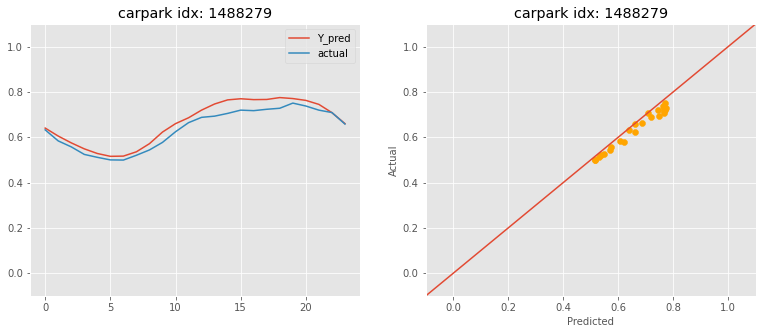

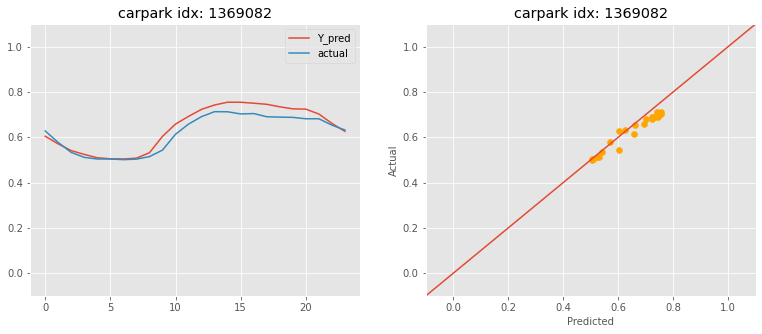

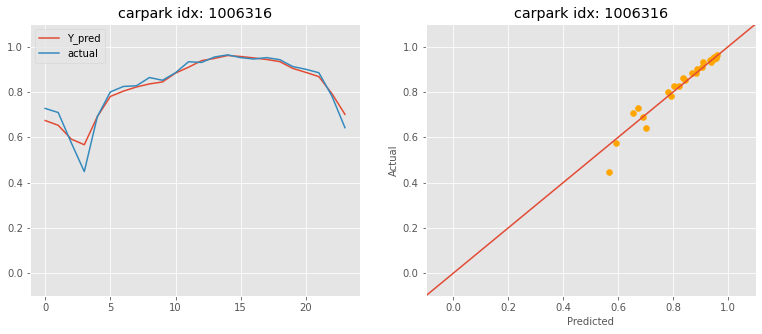

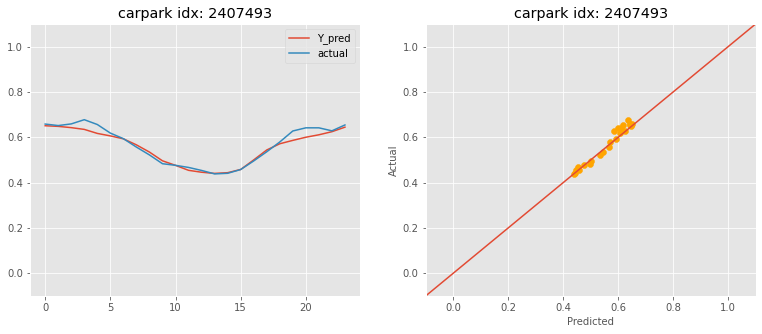

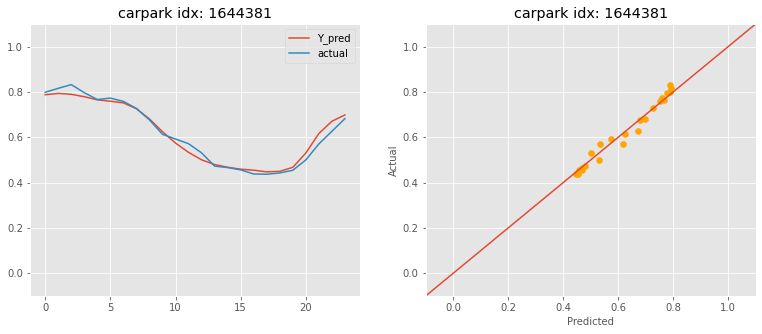

In [76]:
import random
for idx in range(5):
    idx = random.randint(0, len(testX))
    plt.figure(figsize = (13,5))
    plt.subplot(1,2,1)
    plt.ylim(-0.1,1.1)
    plt.title("carpark idx: %s" %idx )
    plt.plot(Y_pred[idx], label='Y_pred')
    plt.plot(testY[idx], label='actual')
    plt.legend()
    
    plt.subplot(1,2,2)
    plt.title("carpark idx: %s" %idx )
    plt.xlim(-0.1,1.1)
    plt.ylim(-.1,1.1)
    plt.scatter(Y_pred[idx], testY[idx], label='Y_pred', color='orange')
    plt.plot([0, 1], [0, 1], transform=plt.gca().transAxes)
    plt.xlabel('Predicted', fontsize=10)
    plt.ylabel('Actual', fontsize=10)

# Model 2: Linear Regression

In this section, we will use Linear Regression model to predict the parking availability of the next 24 hours. From Q2, we have established that LR model is has generally a better performance than SVR and DT. Here, we will investigate if it has better performance that MLP and LSTM.

First, we fit our LR model with the trainX and trainY. The training and test sets are derived from the original data set with a ratio of 70%:30% respectively.

In [27]:
from sklearn.linear_model import LinearRegression
model_lr = LinearRegression()
model_lr.fit(trainX, trainY)

LinearRegression()

The following kernel is such that the train model will be saved for future runs (assuming training set remains the same).

In [63]:
# Saving the model
import pickle
pickle.dump(model_lr, open(filename, 'wb'))

In [64]:
# Loading the saved model
filename = 'models/lr_sklearn_model.sav'
model_lr = pickle.load(open(filename, 'rb'))
y_pred_lr = model_lr.predict(testX)
display(trainX)

array([[0.40104167, 0.33984375, 0.328125  , ..., 0.5859375 , 0.5625    ,
        0.51953125],
       [0.33984375, 0.328125  , 0.328125  , ..., 0.5625    , 0.51953125,
        0.46875   ],
       [0.328125  , 0.328125  , 0.32421875, ..., 0.51953125, 0.46875   ,
        0.453125  ],
       ...,
       [0.43772727, 0.43772727, 0.40625   , ..., 0.40625   , 0.40625   ,
        0.40625   ],
       [0.43772727, 0.40625   , 0.40625   , ..., 0.40625   , 0.40625   ,
        0.40625   ],
       [0.40625   , 0.40625   , 0.40625   , ..., 0.40625   , 0.40625   ,
        0.40625   ]])

In [73]:
# Function to map testId to Carpark Id with dropped data accounted for
def mapTestIdToCarpark(testId):
    arr = ["A10","A100","A11","A12","A13","A15","A2","A20","A21","A24","A25","A26","A27","A28","A29","A30","A31","A33","A34","A35","A36","A37","A38","A39","A4","A40","A41","A42","A43","A44","A45","A47","A48","A49","A50","A51","A52","A53","A54","A59","A60","A61","A63","A64","A65","A66","A67","A68","A69","A7","A70","A71","A72","A73","A74","A75","A76","A77","A78","A8","A81","A82","A85","A87","A88","A9","A94","A98","ACB","ACM","AH1","ALL","AM14","AM16","AM18","AM19","AM20","AM22","AM32","AM43","AM46","AM51","AM64","AM79","AM80","AM81","AM96","AR1L","AR1M","AR2L","AR2M","AR5M","AR7L","AR7M","AR9","AV1","B10","B10M","B11","B14","B16","B17","B19","B20","B21","B23M","B23T","B24","B25","B26","B27","B28","B30","B31","B32","B33","B34","B35","B40","B41","B42","B43","B44","B44B","B45","B45A","B45B","B46","B47","B48","B48B","B49","B50","B51","B52","B53","B54","B57","B59","B6","B60","B63","B65","B65L","B65M","B66","B67","B69","B7","B70","B71","B71M","B72","B73","B74","B75","B79","B7A","B7B","B8","B80","B81","B83","B84","B85","B86","B88","B88M","B89","B8B","B9","B90","B90M","B91","B92","B94","B94A","B95","B96","B97","B98","B99M","BA1","BA2","BA3","BA4","BB","BB8M","BBB","BBM1","BBM2","BBM3","BBM5","BBM7","BBM8","BBM9","BE10","BE11","BE12","BE13","BE14","BE18","BE19","BE22","BE23","BE232","BE241","BE25","BE26","BE27","BE28","BE29","BE3","BE30","BE31","BE32","BE33","BE34","BE35","BE36","BE37","BE38","BE39","BE3R","BE4","BE40","BE42","BE44","BE45","BE5","BE6","BE7","BE8","BE9","BH1","BH2","BJ1","BJ10","BJ11","BJ12","BJ13","BJ14","BJ15","BJ16","BJ17","BJ18","BJ19","BJ2","BJ20","BJ21","BJ23","BJ24","BJ25","BJ26","BJ27","BJ28","BJ29","BJ3","BJ30","BJ31","BJ32","BJ33","BJ34","BJ35","BJ36","BJ37","BJ38","BJ39","BJ4","BJ40","BJ41","BJ42","BJ43","BJ44","BJ45","BJ48","BJ49","BJ50","BJ51","BJ52","BJ53","BJ54","BJ55","BJ56","BJ57","BJ58","BJ60","BJ61","BJ62","BJ63","BJ65","BJ66","BJ67","BJ68","BJ69","BJ71","BJ72","BJ8","BJAL","BJBL","BJMP","BKE1","BKE2","BKE3","BKE4","BKE7","BKE9","BKRM","BL10","BL13","BL15","BL17","BL18","BL18M","BL19","BL19S","BL22","BL23","BL3","BL8","BL8L","BLM","BM1","BM10","BM13","BM14","BM19","BM2","BM20","BM26","BM28","BM29","BM3","BM30","BM31","BM4","BM5","BM6","BM9","BMVM","BP1","BP2","BR10","BR11","BR12","BR14","BR4","BR5","BR6","BR8","BR9","BRB1","BRBL","BRM","BRM1","BRM3","BRM4","BRM5","BRM6","BRM7","BTM","BTM2","BTM3","BVM2","BWM","C10","C11","C12","C13M","C14M","C15M","C16","C17","C18","C18A","C19M","C20","C20M","C21L","C21M","C22M","C24","C25","C26","C27","C28M","C29","C29A","C30","C31","C32","C33","C34","C35","C36","C37","C38","C3M","C3ML","C4M","C5","C6","C7","C8","C9","CAM","CC1","CC10","CC11","CC12","CC4","CC5","CC6","CC7","CC8","CC9","CCKC","CDM","CK1","CK10","CK11","CK12","CK13","CK14","CK15","CK16","CK17","CK18","CK19","CK2","CK20","CK21","CK22","CK23","CK24","CK25","CK28","CK29","CK3","CK30","CK31","CK32","CK33","CK34","CK35","CK36","CK37","CK38","CK39","CK3A","CK4","CK40","CK41","CK42","CK44","CK45","CK46","CK47","CK48","CK49","CK50","CK51","CK52","CK53","CK54","CK55","CK56","CK57","CK58","CK59","CK6","CK60","CK61","CK62","CK63","CK64","CK65","CK66","CK6A","CK7","CK70","CK71","CK72","CK73","CK74","CK75","CK76","CK77","CK78","CK8","CK8A","CK9","CK9A","CKM1","CKM2","CKM3","CKM4","CKM5","CKM6","CKM7","CKM8","CKM9","CKT1","CKT2","CLM","CLRG","CLTR","CM1","CR1","CR1A","CR1B","CR2","CR29","CR3","CR30","CR31","CR6","CR7","CSM","CTM1","CV1","CV2","CV3","CVBK","CY","DRM1","DRM2","DRM3","DRM4","DRM5","DRS","DSR1","DSR2","DSRL","DUX","DUXM","DWSO","DWSP","DWST","DWSV","DWVT","EC2","EC3","EC4","EC7","EC8","ECM","EI3","EPL","EPM","EPML","FR2C","FR3M","FR4M","FRM","GBM","GE1A","GE1B","GE1C","GE1F","GE1G","GE2","GE3","GE5","GEM","GEML","GM1A","GM1M","GM2","GM2A","GM3","GM5","GM6A","GM6B","GMLM","GSM","GSML","H12","H14","H17","H18","H3","H4","H6","H8","H93L","HCM","HE1","HE12","HE17","HE19","HE24","HE3","HE4","HE8","HE9","HG1","HG10","HG11","HG12","HG13","HG14","HG15","HG16","HG17","HG18","HG19","HG1A","HG1B","HG1C","HG1D","HG1E","HG1F","HG2","HG20","HG22","HG23","HG24","HG25","HG29","HG2A","HG2B","HG2C","HG2D","HG30","HG31","HG32","HG33","HG34","HG35","HG36","HG37","HG38","HG39","HG3B","HG3D","HG3E","HG3L","HG4","HG41","HG42","HG43","HG44","HG45","HG46","HG47","HG48","HG49","HG5","HG50","HG51","HG52","HG53","HG54","HG55","HG56","HG60","HG61","HG62","HG64","HG67","HG68","HG69","HG7","HG70","HG71","HG73","HG74","HG75","HG76","HG77","HG78","HG79","HG80","HG86","HG87","HG88","HG89","HG9","HG90","HG91","HG92","HG93","HG94","HG95","HG96","HG97","HG98","HG99","HG9T","HLM","HR1","HR2","HR3","HR4","HR5","HRM","HVM","J1","J10","J11","J12","J14","J15","J16","J17","J18","J19","J2","J20","J21","J22","J23","J23M","J24","J25","J26","J27","J29","J3","J32","J33","J34","J35","J36","J37","J38","J39","J4","J40","J41","J43","J44","J45","J46","J47","J48","J49","J49M","J5","J50","J51","J52","J53","J54","J55","J56","J57","J57L","J6","J60L","J60M","J61","J62","J62M","J63","J64","J65","J66","J67","J68M","J69","J7","J70","J71","J72","J73","J74","J74M","J75M","J76M","J77M","J78M","J79M","J8","J80M","J80MS","J80S","J81M","J82M","J83M","J84M","J84S","J85M","J86M","J86S","J88M","J89M","J8M","J9","J90","J91","J92","J93","J94","J95","J96","J97","J98M","J99M","JB1","JB2","JB3","JB4","JB42","JBM","JBM2","JCM","JCML","JKM","JKS","JM1","JM10","JM11","JM12","JM13","JM13S","JM14","JM15","JM16","JM17","JM18","JM19","JM2","JM20","JM21","JM22","JM23","JM24","JM25","JM26","JM27","JM28","JM29","JM3","JM30","JM31","JM32","JM4","JM5","JM6","JM7","JM7M","JM8","JM8M","JM9","JMB1","JMB2","JMB3","JMSC","JMSU","JRM","JRTM","JS1L","JS3L","JS4L","JS5L","JSA1","JSR1","JSR2","K10","K19","K2","K2T","K52","K7","KAM","KAML","KAMS","KAS","KB1","KB10","KB11","KB12","KB14","KB17","KB18","KB20","KB3","KB4","KB7","KBM","KE1","KE2","KE3","KE3M","KE4","KEM1","KJ1","KJ2","KJ3","KJ4","KJM1","KJM2","KJML","KLM","KM1","KM2","KM3","KM4","KRM","KTM","KTM2","KTM3","KTM4","KTM5","KTM6","KU1","KU2","KU3","KU4","KU9","L1","LBM","LT1","LT2","LT3","LUB","M1","M16","M20","M25","M3","M32","M33","M35","M36","M37","M38","M4","MLM","MLM1","MM1","MM2","MM3","MM4","MM6","MN1","MN2","MNM","MNRM","MP1","MP12","MP13","MP14","MP15","MP16","MP17","MP19","MP1M","MP2","MP2M","MP3M","MP4M","MP5","MP5M","MP5S","MP6","MP7","MPS","MR4","MR5","MR567","MR6","MR7","N0012","NBRM","NT1","NT2","NT3","NT4","NT5","NTL","P1","P11","P12","P13","P14","P15","P16","P17","P2","P3","P34L","P35L","P4","P40L","P40L1","P40L2","P5","P5L","P6","P6L","P6M","P7","P73L","P8","P9","PD8W","PDC4","PDC5","PDJ3","PDJ7","PDL2","PDP4","PDP5","PDQ5","PDR2","PDR6","PDR7","PDS1","PDT8","PDW5","PDW7","PDW8","PGS","PL10","PL11","PL12","PL13","PL14","PL15","PL16","PL17","PL18","PL19","PL20","PL21","PL22","PL23","PL24","PL25","PL26","PL27","PL28","PL29","PL30","PL31","PL32","PL33","PL34","PL35","PL36","PL37","PL38","PL39","PL40","PL41","PL42","PL43","PL44","PL45","PL46","PL47","PL48","PL49","PL50","PL51","PL52","PL53","PL54","PL55","PL56","PL57","PL58","PL59","PL60","PL61","PL62","PL65","PL66","PL67","PL68","PL69","PL70","PL71","PL75","PL77","PL78","PM10","PM11","PM12","PM13","PM14","PM15","PM16","PM17","PM18","PM19","PM2","PM20","PM21","PM22","PM23","PM24","PM25","PM26","PM27","PM28","PM29","PM3","PM30","PM32","PM33","PM34","PM35","PM36","PM37","PM38","PM4","PM40","PM41","PM43","PM44","PM45","PM46","PM5","PM6","PM7","PM8","PM9","PP1","PP2","PP3","PP4","PP5","PP6","PP9T","PR1","PR10","PR12","PR13","PR14","PR2","PR3","PR4","PR6","PR7","PR8","PRM","PRS1","Q16","Q16A","Q17","Q19","Q41","Q65","Q66","Q67","Q68","Q70","Q73","Q75M","Q77M","Q8","Q80","Q81","Q82","Q84","Q85","Q86","Q87","Q88","Q89","Q94","Q96","RC1","RC2","RC3","RCB","RCM","RH3","RHM","RHM2","RHM3","RHM4","RHS","S100","S102","S103","S104","S105","S106","S107","S108","S109","S110","S111","S113","S114","S116","S13L","S14L","S15L","S19L","S24L","S28L","S30L","S36L","S38L","S39L","S40L","SAM","SAM2","SB1","SB10","SB11","SB12","SB13","SB15","SB16","SB17","SB18","SB19","SB2","SB20","SB21","SB22","SB23","SB24","SB25","SB26","SB27","SB28","SB28L","SB29","SB3","SB30","SB31","SB32","SB33","SB34","SB35","SB36","SB37","SB38","SB39","SB4","SB40","SB41","SB42","SB43","SB44","SB45","SB46","SB47","SB5","SB6","SB7","SB8","SB9","SD1","SD11","SD2","SD3","SD4","SD5","SD9","SDM","SDM2","SE11","SE12","SE13","SE14","SE15","SE16","SE17","SE18","SE19","SE20","SE21","SE22","SE23","SE24","SE25","SE26","SE27","SE28","SE29","SE31","SE32","SE33","SE34","SE35","SE37","SE38","SE39","SE40","SE41","SE42","SE43","SE50","SE51","SE52","SE53","SE5L","SE9","SG1","SG2","SG3","SG4","SGLM","SGTM","SH1","SH2","SI1","SI10","SI11","SI12","SI13","SI2","SI4","SI6","SI7","SI8","SI9","SIM1","SIM2","SIM3","SIM4","SIM5","SIM6","SK1","SK10","SK11","SK12","SK13","SK14","SK15","SK16","SK17","SK18","SK19","SK2","SK20","SK21","SK22","SK23","SK24","SK25","SK26","SK27","SK28","SK29","SK3","SK30","SK31","SK32","SK33","SK34","SK35","SK36","SK37","SK38","SK39","SK4","SK40","SK41","SK42","SK43","SK44","SK45","SK46","SK47","SK48","SK49","SK5","SK50","SK51","SK52","SK53","SK54","SK55","SK58","SK59","SK6","SK60","SK61","SK62","SK63","SK64","SK65","SK66","SK67","SK68","SK69","SK7","SK70","SK71","SK72","SK73","SK74","SK75","SK76","SK77","SK78","SK79","SK8","SK80","SK81","SK82","SK83","SK84","SK85","SK86","SK87","SK88","SK89","SK9","SK90","SK91","SK92","SK93","SK94","SK95","SK96","SK97","SK98","SK99","SLS","SM1","SM3","SM9","SM9A","SM9B","SMM","SPM","SPS","STAM","STM1","STM2","STM3","T1","T11","T12","T13","T15","T16","T17","T18","T19","T20","T24","T25","T26","T27","T28","T29","T3","T30","T31","T32","T34","T35","T37","T38","T39","T4","T41","T42","T43","T44","T45","T46","T47","T47A","T48","T49","T49A","T50","T51","T55","T57","T58","T7","T72","T73","T74","T75","T76","T77","T78","T79","T7A","T8","T80","T81","T9","TAM1","TAM2","TB1","TB10","TB11","TB14","TB17","TB18","TB19","TB2","TB22","TB23","TB28","TB3","TB4A","TB6","TB7","TB8","TB9","TBC2","TBC3","TBCM","TBL","TBM","TBM2","TBM3","TBM4","TBM5","TBM6","TBM7","TBM8","TBMT","TE1","TE13","TE14","TE2","TE25","TE3","TE4","TEST","TG1","TG2","TG3","TG6","TG7","TGM1","TGM2","TGM3","TGM4","TGML","TJ27","TJ28","TJ28M","TJ29","TJ30","TJ30S","TJ31","TJ32","TJ33","TJ33S","TJ34","TJ35","TJ36","TJ37","TJ38","TJ39","TJ41","TJ42","TJSF","TM10","TM11","TM12","TM13","TM14","TM15","TM16","TM17","TM18","TM19","TM20","TM21","TM22","TM23","TM24","TM25","TM26","TM27","TM28","TM29","TM3","TM30","TM31","TM32","TM33","TM34","TM35","TM36","TM37","TM4","TM41","TM42","TM43","TM44","TM45","TM46","TM47","TM48","TM49","TM5","TM50","TM51","TM52","TM53","TM54","TM55","TM6","TM7","TM8","TM9","TP10","TP12","TP14","TP15","TP16","TP17","TP18","TP2","TP20","TP22","TP27","TP3","TP30","TP31","TP34","TP36","TP3A","TP40","TP41","TP43","TP48","TP49","TP4A","TP50","TP52","TP53","TP54","TP60","TP62","TP63","TP67","TP68","TP7","TP8","TPB1","TPL","TPM","TPM2","TPM3","TPM4","TPM5","TPM6","TPM7","TPM8","TPM9","TPMA","TPMB","TPMC","TPMD","TPME","TPMF","TPMG","TPMH","TPMJ","TPMK","TPML","TPMM","TPMN","TPMP","TPMQ","TPMR","TR1","TRM","TRS","TW1","TW2","TW3","TW4","TWM1","TWM2","TWM3","TWM4","U1","U10","U11","U12","U13","U15","U17","U18","U19","U2","U21","U22","U23","U24","U24T","U25","U26","U27","U28","U29","U3","U30","U31","U32","U33","U34","U38","U39","U4","U40","U41","U43","U43Z","U45","U46","U48","U5","U50","U51","U52","U54","U55","U56","U57","U58","U6","U60","U63","U64","U65","U66","U68","U69","U7","U70","U8","U9","UA2","UA3","UA5","UAM1","UBK2","UBK4","UBK5","UBKM","UBM1","UBM2","W1","W10","W100","W101","W102","W103","W104","W105","W106","W107","W108","W109","W11","W11M","W12L","W12M","W13","W14","W15","W17","W18","W181","W182","W185","W19","W2","W20","W21","W23","W24","W25","W26","W27","W28","W3","W30","W36","W37","W39","W4","W40","W41","W43","W44","W45","W46","W48","W49","W4M","W5","W50","W505","W509","W51","W516","W517","W52","W527","W53","W536","W54","W546","W549","W55","W554","W56","W56L","W57","W570","W574","W578","W579","W58","W586","W588","W59","W5M","W6","W61","W64","W65","W66","W67","W676","W68","W69","W691","W693","W694","W7","W70","W71","W717","W72","W73","W74","W75","W76","W77","W78","W780","W782","W783","W785","W79","W80","W81","W82","W83","W84","W85","W86","W87","W88","W887","W889","W89","W8M","W90","W91","W92","W93","W94","W95","W96","W98","WCB","WCC","WD1B","WDB1","Y1","Y10","Y11","Y12","Y13","Y14","Y15","Y16","Y17","Y18","Y19","Y2","Y20","Y21","Y21M","Y23","Y24","Y25","Y25M","Y26","Y27","Y28","Y28M","Y29","Y3","Y30M","Y31","Y32","Y33","Y34","Y34A","Y35","Y36","Y38","Y39","Y3M","Y4","Y40","Y41","Y41M","Y43","Y45","Y45M","Y46","Y48","Y48M","Y49","Y49HV","Y49L","Y49M","Y5","Y51","Y51M","Y52M","Y53M","Y54M","Y56","Y57","Y58","Y59M","Y6","Y60M","Y61M","Y62M","Y63M","Y64M","Y65M","Y66M","Y68L","Y68M","Y69M","Y7","Y70M","Y71M","Y73M","Y74M","Y75M","Y76M","Y77L","Y77M","Y78M","Y8","Y82M","Y9","YHS"]
    return arr[int(testId/1330)]

This section will randomly select 10 carparks and display the actual and predicted data for the time frame. This is solely for visualisation purposes. 

randomList: [1103693, 415194, 1379983, 1171, 765396, 1888618, 1792732, 2268368, 2500032, 2233696]


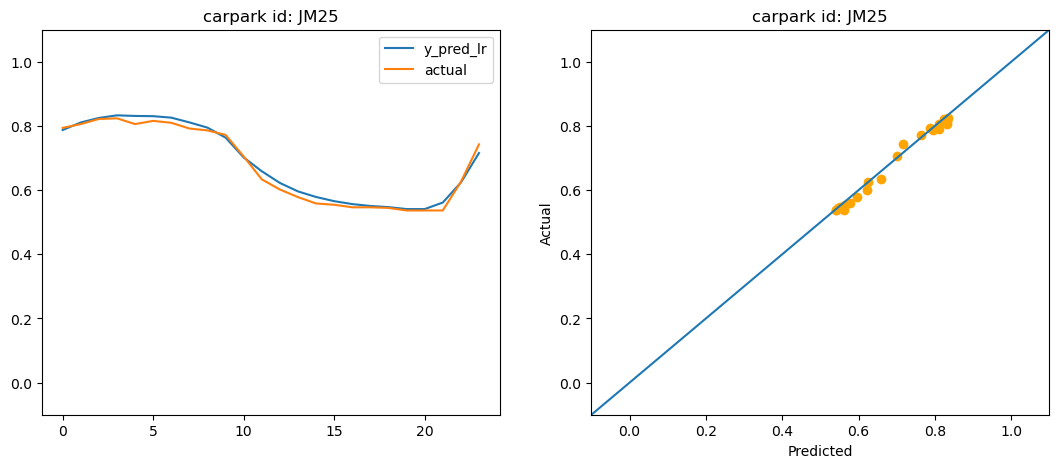

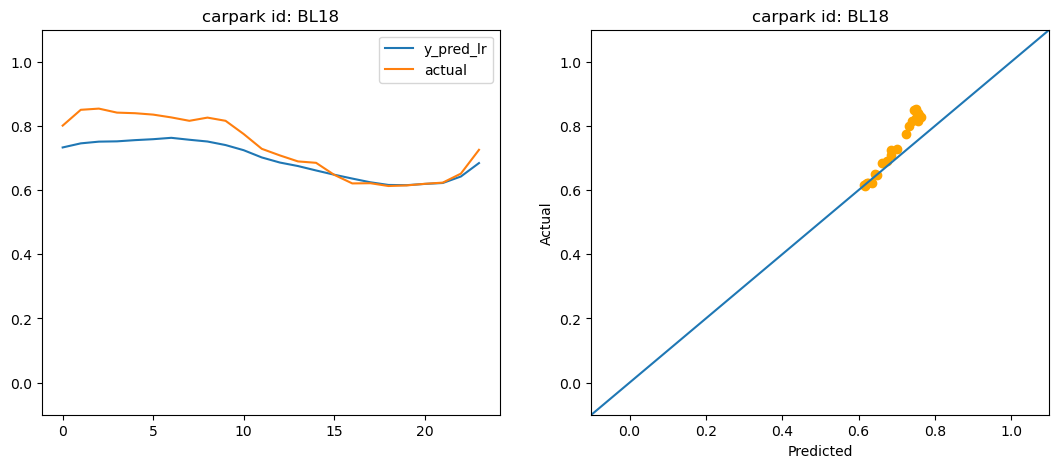

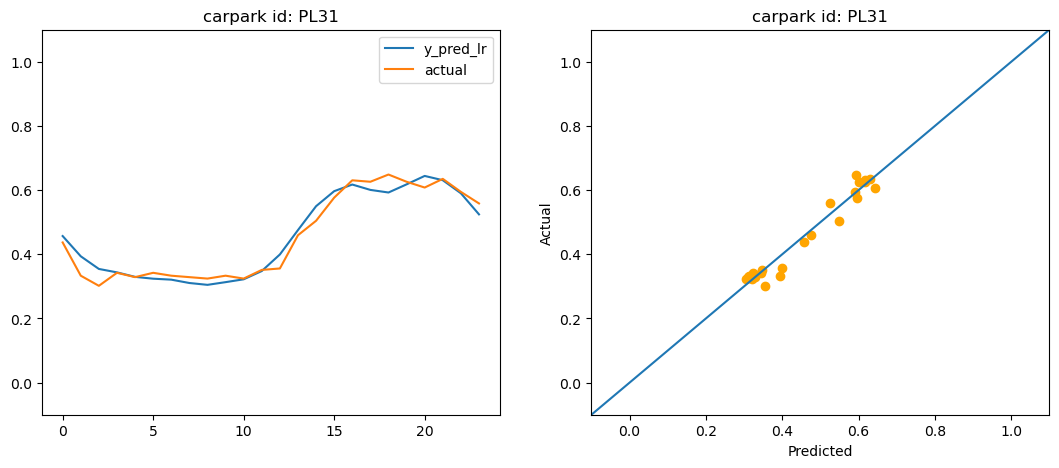

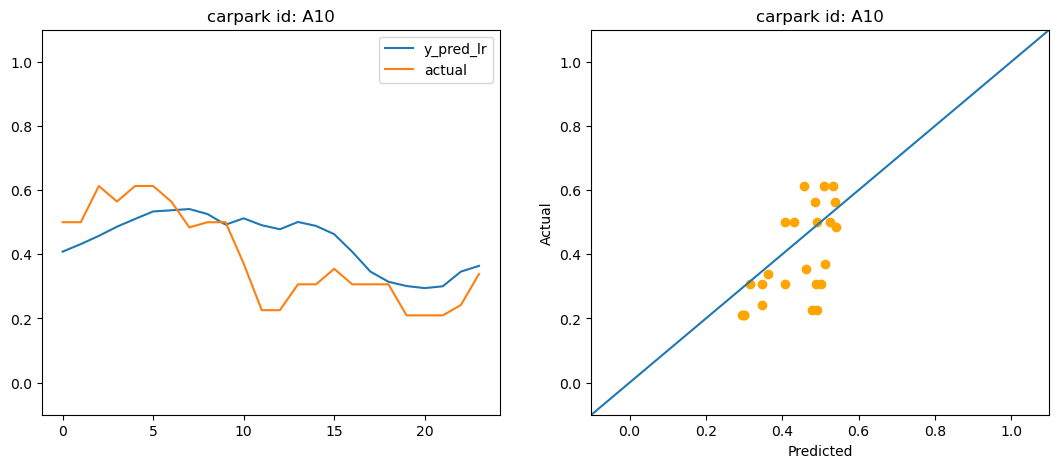

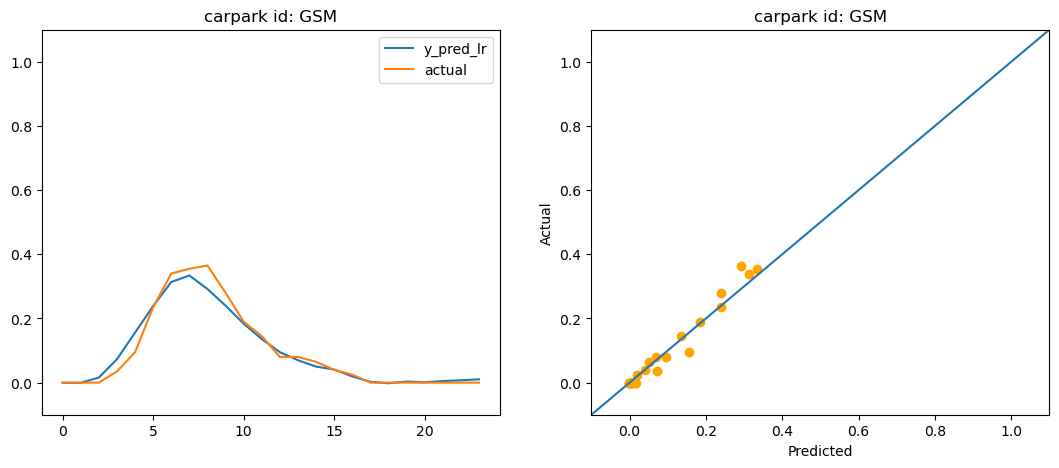

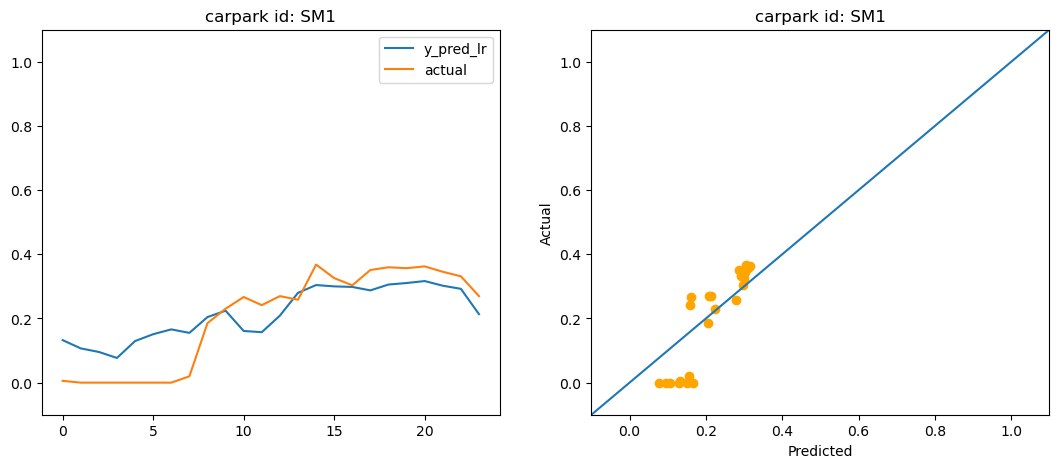

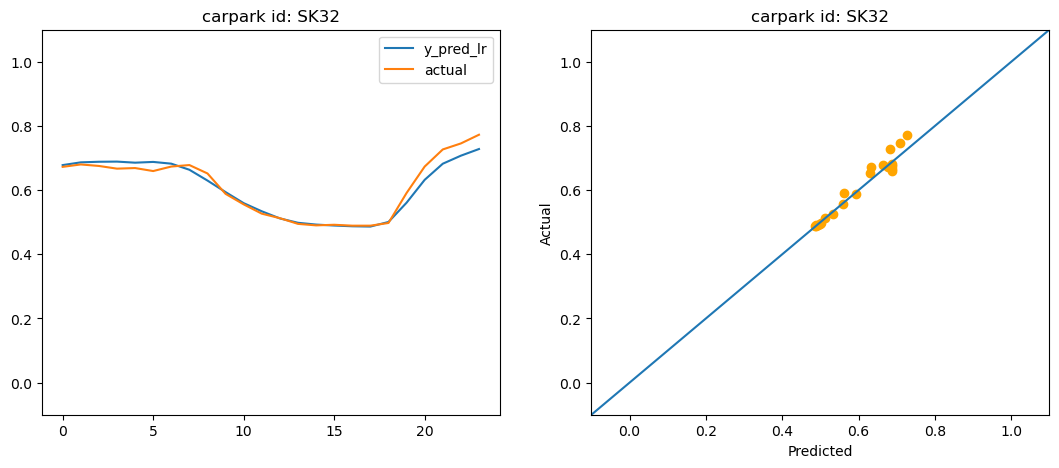

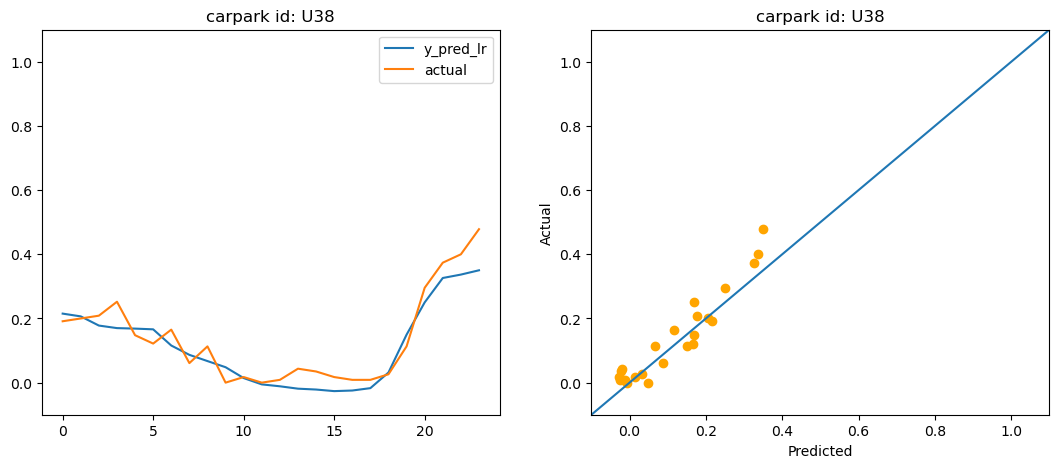

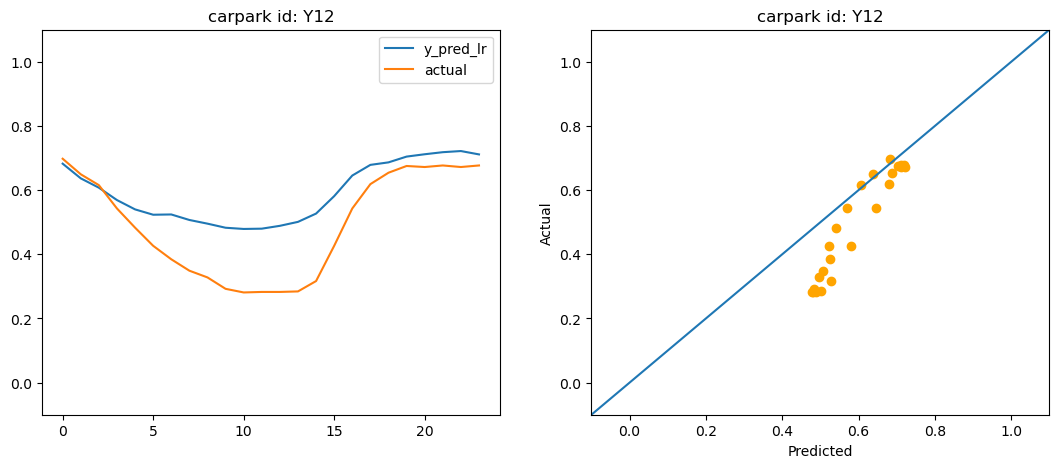

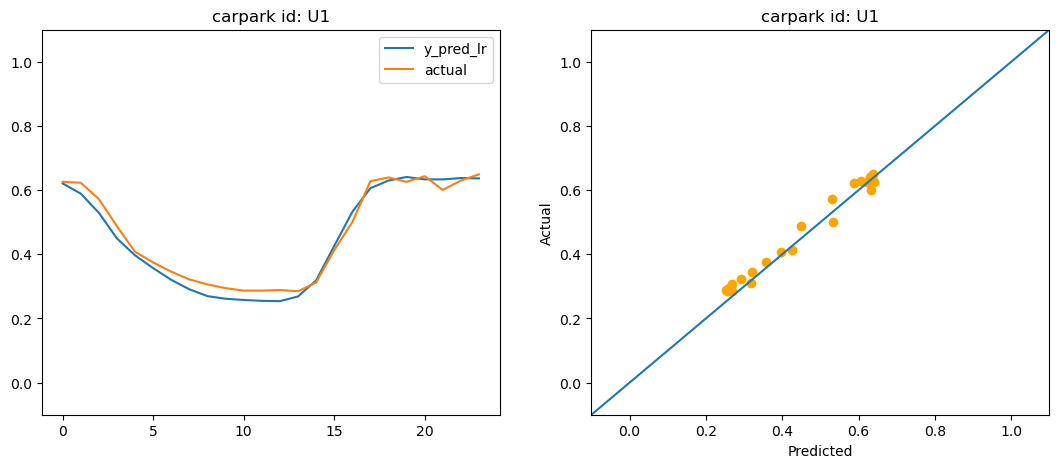

In [86]:
import random
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error, mean_absolute_error
randomList = [random.randint(0,len(testY)) for i in range(10)]
print(f"randomList: {randomList}")

for i in randomList:
    plt.figure(figsize = (13,5))
    plt.subplot(1,2,1)
    plt.ylim(-0.1,1.1)
    plt.title(f"carpark id: {mapTestIdToCarpark(i)}" )
    plt.plot(y_pred_lr[i], label='y_pred_lr')
    plt.plot(testY[i], label='actual')
    plt.legend()
    
    plt.subplot(1,2,2)
    plt.title(f"carpark id: {mapTestIdToCarpark(i)}" )
    plt.xlim(-0.1,1.1)
    plt.ylim(-.1,1.1)
    plt.scatter(y_pred_lr[i], testY[i], label='y_pred_lr', color='orange')
    plt.plot([0, 1], [0, 1], transform=plt.gca().transAxes)
    plt.xlabel('Predicted', fontsize=10)
    plt.ylabel('Actual', fontsize=10)


### Intepretation of model's performance
The LR model has a very high R Square value of 0.948 which indicates a good fit between predicted and actual value. It means that the output's variance can be very well explained by the variance in the input features.

The percentage error at 4.07% means that the predicted values are very close to the actual values.

From these metrics, it can be seen that LR is a fairly good model for this data distribution.

From the randomly selected scatter plots, we can see that the points are all very close to the line y=x, which means that the predicted availability is very close to the actual availability.

Thus, based on above evidence, the model is a good fit for our distribution. We have established that LR model is a good fit from Q2 and the above substantiation.

In [87]:
lr_r2 = metrics.r2_score(testY, y_pred_lr)
lr_mse = metrics.mean_squared_error(testY, y_pred_lr)
lr_abs_error = mean_absolute_error(testY, y_pred_lr)
print(f"Model's r2score: {lr_r2},\nMSE: {lr_mse},\Percentage Error: {lr_abs_error*100} %\n")

Model's r2score: 0.9480106634767015,
MSE: 0.005591564842698372,\Percentage Error: 4.0711792803511395 %



### Error vs Time graph
From the graphs below, we can see that our predictions are extremely accurate in the short run and we can see that mean absolute error plateaus at a low value that is less than 0.045. The mean squared error can also be seen increasing at a decreasing rate to about 0.65% at 20hrs after the keyed in time. Overall, the predictions are extremely accurate for the next 24hrs with its accuracy slowly dwindling 



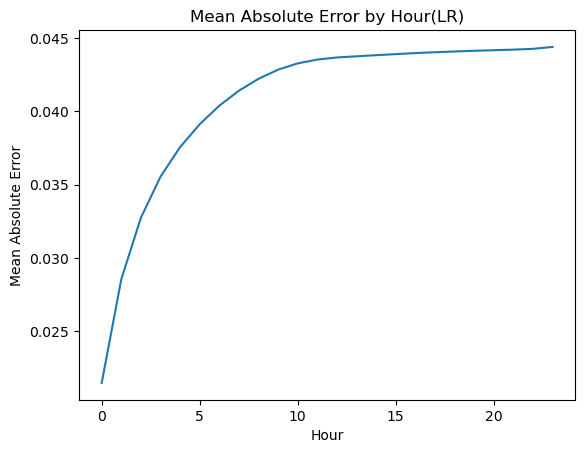

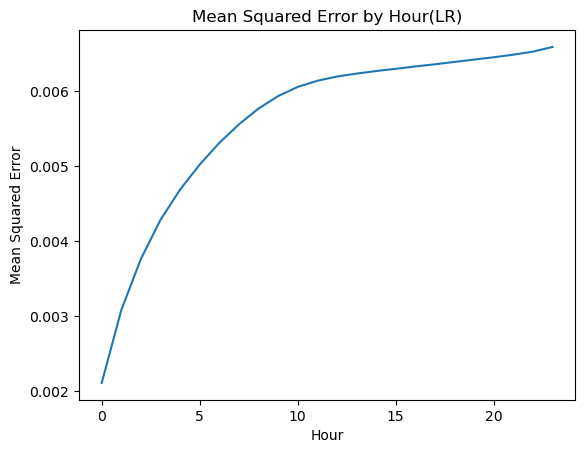

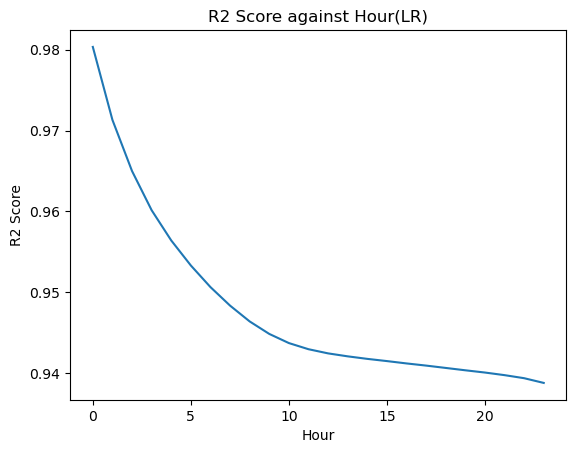

In [89]:
ae_by_hr = []
mse_by_hr = []
r2_by_hr = []
for i in range(24):
    # print("Hour{}:   MSE is {}" .format(i,mean_squared_error(testY[:,i], y_pred_lr[:,i])) )
    # print("               R2 Score is {}" .format(r2_score(testY[:,i], y_pred_lr[:,i])) )
    mse = mean_squared_error(testY[:,i], y_pred_lr[:,i])
    ae = mean_absolute_error(testY[:,i], y_pred_lr[:,i])
    r2 = r2_score(testY[:,i], y_pred_lr[:,i])
    # print("               Absolute Error is {}%" .format(100*ae))
    ae_by_hr.append(ae)
    mse_by_hr.append(mse)
    r2_by_hr.append(r2)
plt.plot(ae_by_hr)
plt.title("Mean Absolute Error by Hour(LR)")
plt.ylabel('Mean Absolute Error', fontsize=10)
plt.xlabel('Hour', fontsize=10)
plt.show()
plt.plot(mse_by_hr)
plt.title("Mean Squared Error by Hour(LR)")
plt.ylabel('Mean Squared Error', fontsize=10)
plt.xlabel('Hour', fontsize=10)
plt.show()
plt.plot(r2_by_hr)
plt.title("R2 Score against Hour(LR)")
plt.ylabel('R2 Score', fontsize=10)
plt.xlabel('Hour', fontsize=10)
plt.show()

# Model 3: LSTM

In [98]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from sklearn.metrics import mean_squared_error

In [50]:
# reshape input to be [samples, time steps, features]
trainX1 = np.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
testX1 = np.reshape(testX, (testX.shape[0], testX.shape[1], 1))
trainX2 = trainX1[2000:4000]
testX2 = testX1[2000:4000]
trainY2 = trainY[2000:4000]
testY2 = testY[2000:4000]
print(testY2.shape)

(2000, 24)


In [51]:
# create and fit the LSTM network
modelX = Sequential()
modelX.add(LSTM(192, input_shape=(192,1), activation="relu"))
modelX.add(Dense(24,  activation="relu"))
modelX.compile(loss='mean_squared_error', optimizer='adam')
modelX.fit(trainX2, trainY2, epochs=20, batch_size=64, verbose=2)

Epoch 1/20
32/32 - 7s - loss: 21573285032605592733089792.0000 - 7s/epoch - 233ms/step
Epoch 2/20
32/32 - 6s - loss: 0.1957 - 6s/epoch - 190ms/step
Epoch 3/20
32/32 - 7s - loss: 0.1957 - 7s/epoch - 213ms/step
Epoch 4/20
32/32 - 7s - loss: 0.1957 - 7s/epoch - 230ms/step
Epoch 5/20
32/32 - 7s - loss: 0.1957 - 7s/epoch - 207ms/step
Epoch 6/20
32/32 - 7s - loss: 0.1957 - 7s/epoch - 231ms/step
Epoch 7/20
32/32 - 7s - loss: 0.1957 - 7s/epoch - 208ms/step
Epoch 8/20
32/32 - 7s - loss: 0.1957 - 7s/epoch - 219ms/step
Epoch 9/20
32/32 - 6s - loss: 0.1957 - 6s/epoch - 203ms/step
Epoch 10/20
32/32 - 7s - loss: 0.1957 - 7s/epoch - 214ms/step
Epoch 11/20
32/32 - 7s - loss: 0.1957 - 7s/epoch - 218ms/step
Epoch 12/20
32/32 - 7s - loss: 0.1957 - 7s/epoch - 207ms/step
Epoch 13/20
32/32 - 6s - loss: 0.1957 - 6s/epoch - 197ms/step
Epoch 14/20
32/32 - 7s - loss: 0.1957 - 7s/epoch - 204ms/step
Epoch 15/20
32/32 - 6s - loss: 0.1957 - 6s/epoch - 199ms/step
Epoch 16/20
32/32 - 6s - loss: 0.1957 - 6s/epoch - 201

In [52]:
# Save the model
# model.save('models/lstm_tf_model.h5')
modelX.save('models/modelXX.h5')

In [53]:
loaded = tf.keras.models.load_model('models/modelXX.h5')
ypred_lstm = loaded.predict(testX2)
print(ypred_lstm.shape)
#show model info
# print(modelX.summary())
# print(testX[0].shape)
# modelX(testX1[0])

63/63 [==============================] - 3s 52ms/step
(2000, 24)


In [54]:
for i in range(24):
    print("Hour{}:   MSE is {}" .format(i,mean_squared_error(testY2[:,i], ypred_lstm[:,i])) )
    print("               R2 Score is {}" .format(r2_score(testY2[:,i], ypred_lstm[:,i])) )

ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

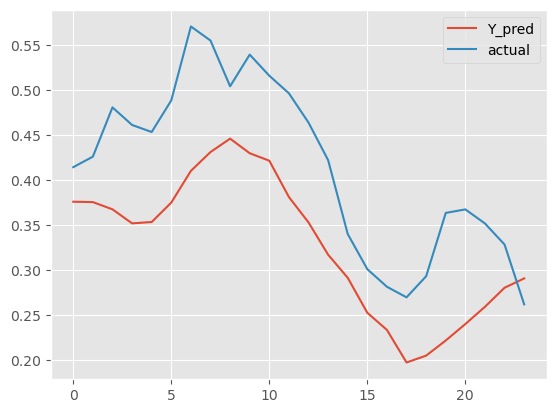

In [56]:
plt.plot(ypred_lstm[22], label='Y_pred')
plt.plot(testY[22], label='actual')
plt.legend()

Text(0, 0.5, 'Actual')

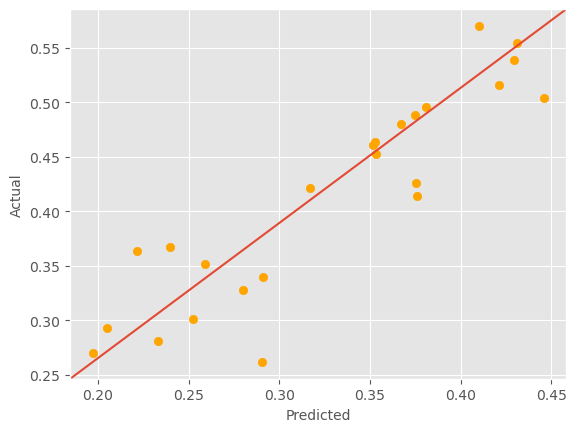

In [57]:
plt.scatter(ypred_lstm[22], testY[22], label='Y_pred', color='orange')
plt.plot([0, 1], [0, 1], transform=plt.gca().transAxes)
plt.xlabel('Predicted', fontsize=10)
plt.ylabel('Actual', fontsize=10)

# Overall Flow

In [1]:
from queue import PriorityQueue
from datetime import timedelta
import pickle
import matplotlib.pyplot as plt
from typing import List, Tuple, Dict
import pandas as pd
import numpy as np
from termcolor import colored
import warnings
warnings.filterwarnings("ignore")

from api_utils import getDataAtTimestamp, json2csv, postalcode2xy

### Helper methods to our app

In [18]:
def update_rencet_csv(time_now, recent):
    '''
    update recent data from API and store locally in a csv file
    '''
    range = timedelta(hours=191)
    start = time_now - range
    end = time_now
    for date in pd.date_range(start, end, freq='1h'):
        if date not in recent.index:
            recent.loc[date] = np.nan
            year, month, day, hour, mins = date.year, date.month, date.day, date.hour, date.minute+1
            try:
                raw_data = getDataAtTimestamp(str(year), str(month), str(day), str(hour), str(mins))
            except:
                continue
            raw_df = json2csv(raw_data, date)
            raw_df['lots_available'] = raw_df['lots_available'].astype(float)
            raw_df['total_lots'] = raw_df['total_lots'].astype(float)
            raw_df['available rate'] = raw_df['lots_available'] / raw_df['total_lots']
            for id in raw_df.carpark_number:
                if id in recent.columns:
                    recent.loc[date, id] = raw_df[raw_df.carpark_number == id]['available rate'].values[0]
                else:
                    print("Id not seen!")
    recent.to_csv("./data/recent.csv")

def find_nearest(x, y, location_dict) -> List[Tuple[float, str]]:
    '''
    Sort carparks by distance to the given location
    '''
    shortest = PriorityQueue()
    for key, (loc, addr) in location_dict.items():
        dist = (loc[0] - x)**2 + (loc[1] - y)**2
        shortest.put((-dist, key))
    size = shortest.qsize()
    res = [shortest.get() for i in range(size)]
    res.reverse()
    return res

def create_location_dict(loc_info: pd.DataFrame) -> Dict[str, Tuple[Tuple[float, float], str]]:
    '''
    Create a dictionary of carparks' location and address with carpark number as key
    '''
    location_dict = {}
    for row in loc_info.iterrows():
        content = row[1]
        name = content[0]
        addr = content[1]
        location = (content[2], content[3])
        location_dict[name] = (location, addr)
    return location_dict

def init():
    '''
    Initialize the app data, including recent data, location dictionary and model
    '''
    model = pickle.load(open('models/mlp_sklearn_model.sav', 'rb'))
    print(colored("Model loaded!", "green"))
    recent = pd.read_csv("./data/recent.csv")
    recent['timestamp'] = pd.to_datetime(recent['timestamp'])
    recent = recent.set_index('timestamp')
    print(colored("Recent data loaded!", "green"))
    loc_info = pd.read_csv("./data/hdb-carpark-information.csv")
    location_info = create_location_dict(loc_info)
    return model, recent, location_info

def get_pred_inputs(recent: pd.DataFrame, id: str):
    '''
    Get the inputs for the model from the recent data based on the carpark number
    '''
    time_now = pd.Timestamp.now()
    time_now = time_now.floor('1h')
    range = timedelta(hours=191)
    if time_now not in recent.index:
        print(colored("Updating recent data! Please wait", "green"))
        update_rencet_csv(time_now, recent)
    most_recent = recent[id][time_now - range: time_now]
    return most_recent.values.reshape(1, -1)

def find_by_location(model,
                                    recent: pd.DataFrame,
                                    carpark_info: Dict[str, Tuple[Tuple[float, float], str]],
                                    x, y):
    """
    Find the nearest 5 carparks to the given location and predict the available rate
    """
    print(colored("Finding nearest carpark...", "green"))
    top5 = find_nearest(x, y, carpark_info)
    res = []
    for ele in top5:
        id = ele[1]
        if id not in recent.columns:
            print(f"We do not have data for the nearby carpark {id}")
            continue
        input = get_pred_inputs(recent, id)
        prediction = model.predict(input)[0]
        res.append((ele[0], ele[1], prediction))
        if (len(res) == 5):
            break
    return res

### main app flow

In [26]:
def app():
    model, recent, location_dict = init()
    print("* Welcome to the carpark availability prediction system")
    print("* Where would you like to go?")

    while True:
        postal_code = input("Enter your destination postal code: ")
        print(postal_code)
        try:
            x, y = postalcode2xy(postal_code)
            best_options = find_by_location(model, recent, location_dict, x, y)
            break
        except:
            print(colored("Invalid Postal Code! Please Try Again", "red"))

    print(colored("Best options is:"))
    print(colored(f"carpark {best_options[0][1]} with distance {-best_options[0][0]}", 'yellow'))
    print(colored("Alternatives are:"))
    for ele in best_options[1:]:
        print(colored(f"carpark {ele[1]} with distance {-ele[0]}"))

    time_now = pd.Timestamp.now()
    time_now = time_now.ceil('1h')
    ranges = [(time_now + timedelta(hours=i)).time() for i in range(0,24,4)]
    print(ranges)
    fig, axs = plt.subplots(min(5, len(best_options)+1), 1, figsize=(10, 25))
    for i in range(len(best_options)):
        axs[i].plot(best_options[i][2])
        axs[i].set_xticks(range(0, 24, 4))
        axs[i].set_xticklabels(ranges)
        axs[i].set_ylim(0, 1)
        axs[i].set_title(f"carpark at {location_dict[best_options[i][1]][1]}\n Distance {-best_options[i][0]}")
    plt.show()


### Run the app

Model loaded!
Recent data loaded!
* Welcome to the carpark availability prediction system
* Where would you like to go?
123456
Invalid Postal Code! Please Try Again
120458
Finding nearest carpark...
Best options is:
carpark C21M with distance 1536.5175304156587
Alternatives are:
carpark C21L with distance 4143.612352416744
carpark C20M with distance 18375.846103456006
carpark C20 with distance 70566.2060457747
carpark C3ML with distance 78272.94962626594
[datetime.time(0, 0), datetime.time(4, 0), datetime.time(8, 0), datetime.time(12, 0), datetime.time(16, 0), datetime.time(20, 0)]


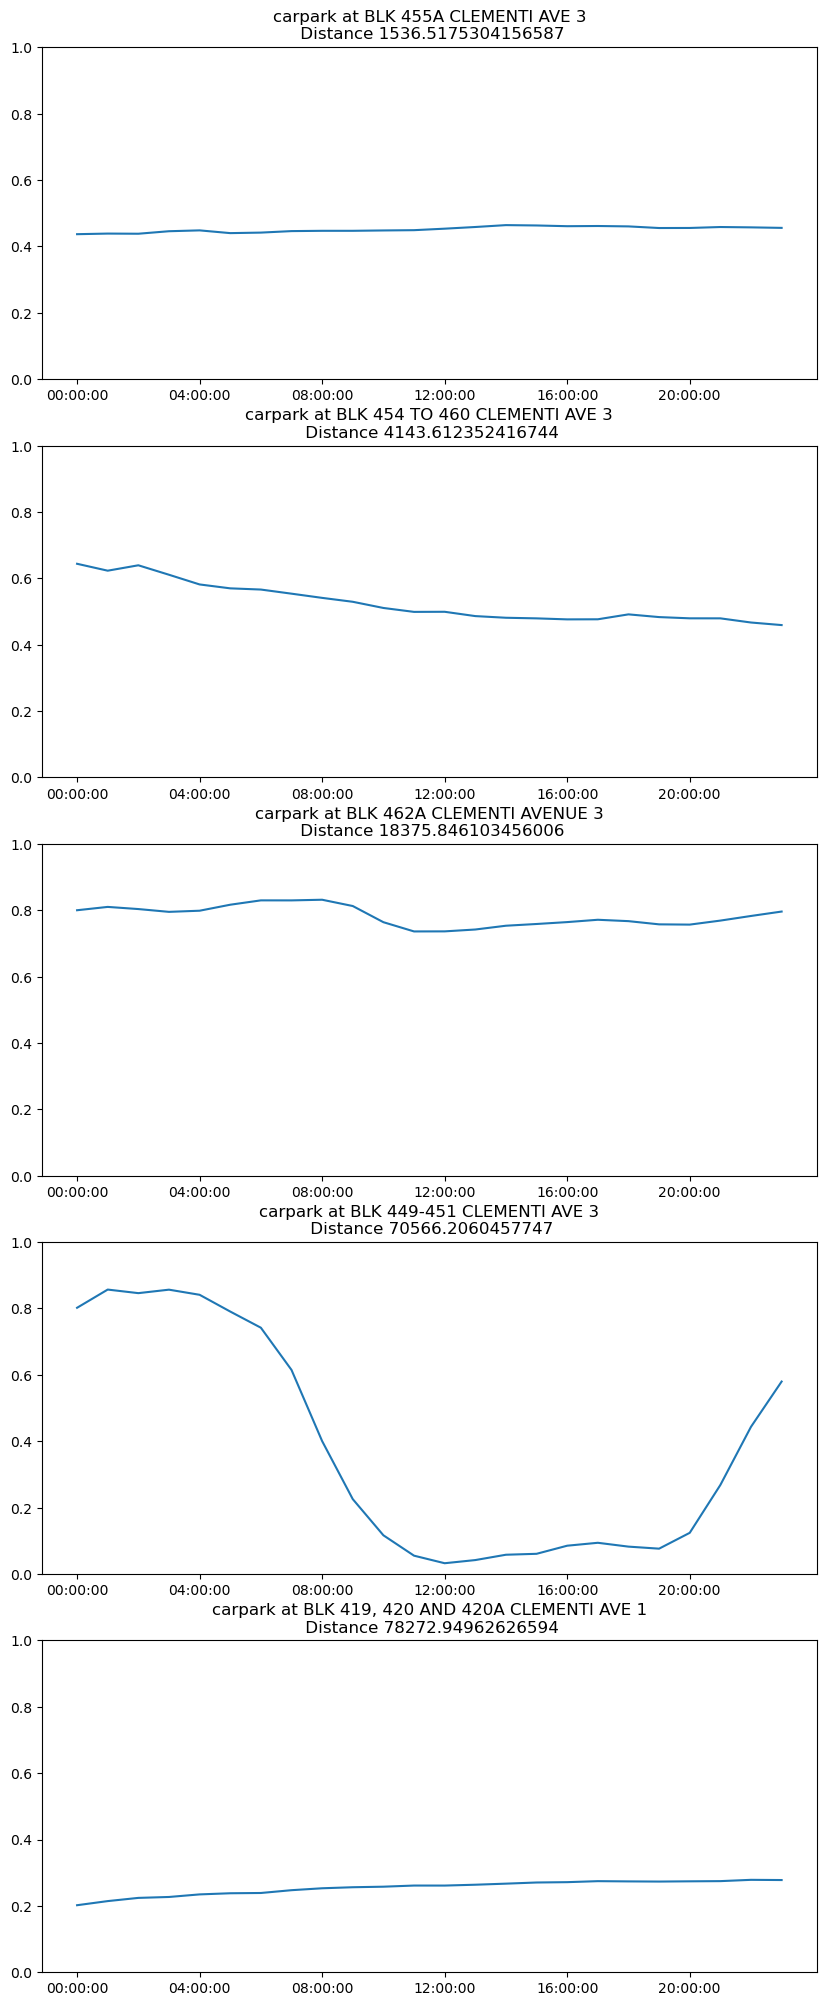

In [27]:
app()